# Project Overview

## Goal & Explanation
The goal of this project is to apply [topic modeling](https://www.datacamp.com/tutorial/what-is-topic-modeling) to Amazon reviews of [Nautica](https://www.nautica.com/) products to accurately categorize and analyze customer feedback. By identifying key themes and sentiments, we aim to uncover valuable marketing and product insights that can drive strategic decisions.

In a market saturated with a myriad of brands, materials, and colors, understanding customer preferences and pain points is crucial. Topic modeling helps in identifying specific attributes that customers appreciate or dislike, providing actionable insights that can enhance product development and marketing strategies.

This analysis is particularly important for differentiating Nautica products in a competitive landscape. Being able to highlight unique selling points and address common issues can significantly impact brand positioning and customer satisfaction. In an industry where standing out is essential for survival, leveraging these insights can provide Nautica with a critical advantage, leading to more informed business decisions and improved product offerings.

Topic modeling is an unsupervised machine learning technique within the field of Natural Language Processing (NLP). It involves employing a range of statistical and deep learning methods to uncover hidden semantic structures in collections of documents. The challenge lies in automatically extracting meaningful insights from these data sources without prior knowledge, a complex problem in unsupervised learning.

Given the intricacies involved, significant effort is required to experiment with various approaches until an effective model is found that generates relevant topic models from reviews. To address this, we will develop two topic modeling approaches:

Latent Dirichlet Allocation (LDA): A traditional and widely-used method for many years, LDA has established itself as a cornerstone in topic modeling. It works by assuming that each document is a mixture of topics and each topic is a mixture of words.

BERTopic: A more recent and advanced approach, BERTopic overcomes several limitations of traditional methods, such as the need to specify the number of topics in advance. It utilizes semantic embeddings and clustering techniques to automatically determine the optimal number of topics and produce more coherent and contextually meaningful results.

By comparing these methods, we aim to identify which approach best captures the underlying themes in the reviews and provides the most valuable insights. 


## Data & Source
[Amazon product data](https://jmcauley.ucsd.edu/data/amazon/index_2014.html)

The datasets used in this project are sourced from the University of San Diego repository. The original dataset includes Amazon product reviews and metadata, encompassing 233.1 million reviews from May 1996 to October 2018. This dataset exceeds 80 GB, making it impractical to work with on a personal computer.

To manage this data effectively, we will use two subsets from the original Amazon product data, focusing specifically on the Clothing, Shoes & Jewelry category. The first subset, Metadata, provides detailed information about products, including product IDs, descriptions, prices, sales ranks, brand information, and co-purchasing links. The second subset contains the Product Reviews, which includes customer reviews and associated product IDs.

By working with these subsets, we can analyze and process a more manageable portion of the data while still obtaining valuable insights related to our specific category of interest.

**Sample metadata**:

{
  "asin": "0000031852",
  "title": "Girls Ballet Tutu Zebra Hot Pink",
  "price": 3.17,
  "imUrl": "http://ecx.images-amazon.com/images/I/51fAmVkTbyL._SY300_.jpg",
  "related":
  {
    "also_bought": ["B00JHONN1S", "B002BZX8Z6", "B00D2K1M3O", "0000031909", "B00613WDTQ", "B00D0WDS9A", "B00D0GCI8S", "0000031895", "B00D10CLVW", "B003AVNY6I", "B002GZGI4E", "B001T9NUFS", "B002R0F7FE", "B00E1YRI4C", "B008UBQZKU", "B00D103F8U", "B007R2RM8W"],
    "also_viewed": ["B002BZX8Z6", "B00JHONN1S", "B008F0SU0Y", "B00D23MC6W", "B00AFDOPDA", "B00E1YRI4C", "B002GZGI4E", "B003AVKOP2", "B009RXWNSI", "B003AVEU6G", "B00HSOJB9M", "B00EHAGZNA", "B0046W9T8C", "B00E79VW6Q", "B00D10CLVW", "B00B0AVO54", "B00E95LC8Q", "B00GOR92SO", "B007ZN5Y56", "B00AL2569W", "B00B608000", "B008F0SMUC", "B00BFXLZ8M"],
    "bought_together": ["B002BZX8Z6"]
  },
  "salesRank": {"Toys & Games": 211836},
  "brand": "Coxlures",
  "categories": [["Sports & Outdoors", "Other Sports", "Dance"]]
}

**metadata fields description**: \
asin - ID of the product, e.g. 0000031852 \
title - name of the product \
price - price in US dollars (at time of crawl) \
imUrl - url of the product image \
related - related products (also bought, also viewed, bought together, buy after viewing) \
salesRank - sales rank information \
brand - brand name \
categories - list of categories the product belongs to 

**Sample review**:

{ 
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "reviewerName": "J. McDonald",
  "helpful": [2, 3],
  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
  "overall": 5.0,
  "summary": "Heavenly Highway Hymns",
  "unixReviewTime": 1252800000,
  "reviewTime": "09 13, 2009"
}

**review  fields descriptions**: \
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B \
asin - ID of the product, e.g. 0000013714 \
reviewerName - name of the reviewer \
helpful - helpfulness rating of the review, e.g. 2/3 \
reviewText - text of the review \
overall - rating of the product \
summary - summary of the review \
unixReviewTime - time of the review (unix time) \
reviewTime - time of the review (raw) 

### Import Libraries

In [460]:
#data cleaning and analysis
import pandas as pd
import numpy as np
import itertools
from collections import Counter
import string
from string import punctuation
from emoji import demojize
from PIL import Image
import pickle
import gzip
import itertools
import json

import requests

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spellchecker import SpellChecker

import tmtoolkit
from tmtoolkit.corpus import Corpus, lemmatize, to_lowercase, remove_chars, filter_clean_tokens
from tmtoolkit.corpus import corpus_num_tokens, corpus_tokens_flattened
from tmtoolkit.corpus import dtm
from tmtoolkit.corpus import vocabulary
from tmtoolkit.corpus import filter_clean_tokens, remove_common_tokens, remove_uncommon_tokens

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tmtoolkit.corpus.visualize import plot_doc_lengths_hist, plot_ranked_vocab_counts
import re
%matplotlib inline

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# modeling & evaluation
from bertopic import BERTopic
from umap import UMAP

from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.topicmod.model_io import save_ldamodel_to_pickle
from tmtoolkit.topicmod.model_io import load_ldamodel_from_pickle
from tmtoolkit.topicmod.visualize import parameters_for_ldavis

from tmtoolkit.topicmod import tm_lda
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results


from lda import LDA
from textblob import TextBlob
import pyLDAvis

import scipy.sparse
import logging
import random
random.seed(20240716)

# other
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import tqdm as notebook_tqdm # auto-save jupyter notebook

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

In [1]:
# packages versions
!pip freeze

annotated-types==0.7.0
anyio @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_a17a7759g2/croot/anyio_1706220182417/work
appnope @ file:///Users/ktietz/ci_310/appnope_1643965056645/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/croot-wbf5edig/argon2-cffi-bindings_1644845754377/work
arrow==1.3.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_02efro5ps8/croot/async-lru_1699554529181/work
attrs @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_224434dqzl/croot/attrs_1695717839274/work
Babel @ file:///private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_00k1rl2pus/croot/babel_1671781944131/work
backcall==0.2.0
beautifulsoup4 @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_94rx5n7wo9/croot/beautifulsoup4-sp

### Import Datasets

Since the datasets are in gzip and JSON formats, we will use the gzip.open and json.loads functions to extract the data. Additionally, we will filter the datasets to include only categories related to Nautica products. For the metadata, we will extract the ASINs and titles, while for the reviews, we will focus on extracting the reviews and ASINs. The ASINs will be crucial for linking products to their corresponding reviews.

In [3]:
META_FILE = "meta_Clothing_Shoes_and_Jewelry.jsonl.gz"

asins = []
titles = []

with gzip.open(META_FILE) as products:
    for product in products:
        meta_data = json.loads(product)
        categories = [c.lower() for c in
                      list(itertools.chain(*meta_data.get("categories", [])))]
        if "nautica" in categories:
            asins.append(meta_data["asin"])
            titles.append(meta_data["title"])

# print the last product details
meta_data

In [5]:
REVIEWS_FILE = "reviews_Clothing_Shoes_and_Jewelry.json.gz"

all_texts = []
asin_ids = [] # create list of asin ids to use

with gzip.open(REVIEWS_FILE) as reviews:
    for review in reviews:
        data = json.loads(review)
        if data["asin"] in asins:
            text = data["reviewText"]
            all_texts.append(text)
            asin_ids.append(data["asin"]) 
            
# print the last review of a product
data

In [6]:
# check the number of asins
len(asins)

4895

In [8]:
# create a dfs
asins_titles = pd.DataFrame(list(zip(asins, titles)),
               columns =['asin', 'title'])

product_reviews = pd.DataFrame(list(zip(asin_ids, all_texts)),
               columns =['asin', 'text'])

# add the title to the df
product_reviews = product_reviews.merge(asins_titles, how="left", on="asin")

# check fields from the dataset
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13009 entries, 0 to 13008
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    13009 non-null  object
 1   text    13009 non-null  object
 2   title   13009 non-null  object
dtypes: object(3)
memory usage: 305.0+ KB


In [9]:
# check some records from the top
product_reviews.head(5)

,asin,text,title
0,B0000C3B55,If you're looking for a pair of pants that are...,Nautica Big &amp; Tall Rigger Pleated Pants
1,B0000C3B55,Great cut and fabric. Thank you NAUTICA. I am ...,Nautica Big &amp; Tall Rigger Pleated Pants
2,B0000V9JVU,I bought this watch back in 2007. It's sporty ...,Nautica - N14503 (Size: men)
3,B0000V9JVU,there should have been an indication of actual...,Nautica - N14503 (Size: men)
4,B0002940O6,"Great watch, it is easy to set up, nice lookin...",Nautica - N13521 (Size: men)


In [10]:
# check some records from the end
product_reviews.tail(5)

,asin,text,title
13004,B00KCUZESG,"Great buy match his sneakers perfect,runs a li...",Nautica Infant Boys Pique Solid Short Sleeve P...
13005,B00KGBMGDC,Color was not true to the picture.,Nautica Women 11&quot; Bermuda Classic Shorts
13006,B00KGZIXKI,gift for husband and he loved it,Nautica Men Slim Fit Logo Polo Pique T-Shirt
13007,B00KI1NCCE,"Since my GF would always wear my pair, leaving...",Nautica Men's Fleece Pajama Lounge Pants
13008,B00KI7BGWQ,"Nice color, light weight and strong matieral. ...","Nautica Mens Short Sleeve Shirt (Blue/Black, XXL)"


In [11]:
# check some records randomly
product_reviews.sample(5)

,asin,text,title
4284,B003N9NLYC,I bought three white and three black shirts to...,Nautica Men's Nautica 3 Pack Crew Neck T-Shirt
9680,B00AREIZ42,"Good fit, but not very long so not very tuckab...",Nautica Men's Vineyard Poplin Short Sleeve Wov...
2897,B001VH6TG0,Updated review: Reordered these socks and they...,Nautica Men's 3-Pack Classic Embroidered Quart...
8321,B008HCJE50,"Nice and good quality, my husband loves it. I ...",Nautica Men's Alliance Print Boxed Pajama Gift...
7886,B008E54T6E,I had to see what this nice outfit looked like...,Nautica Sportswear Kids Baby-girls Infant Polo...


In [12]:
# check products title most common

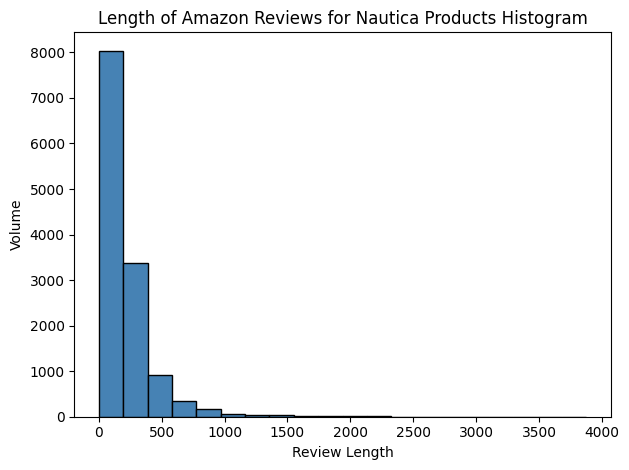

In [13]:
# check the review without data cleaning
plt.hist([len(r) for r in product_reviews["text"]], bins=20, edgecolor='black', color = "steelblue")
plt.title('Length of Amazon Reviews for Nautica Products Histogram')
plt.xlabel('Review Length')
plt.ylabel('Volume')
plt.tight_layout()

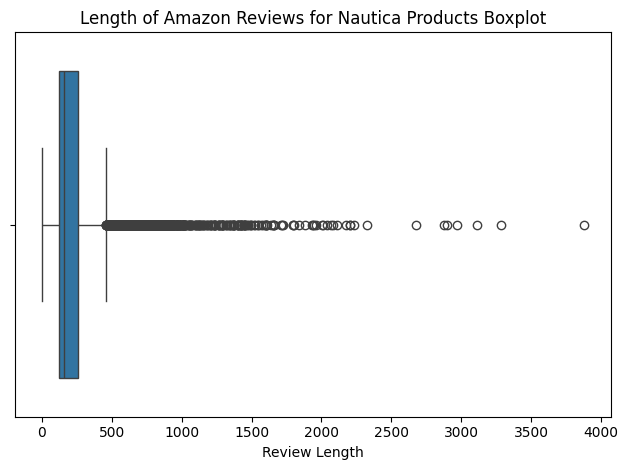

In [14]:
# Check the distribution of temperature
# sns.set(rc={"figure.figsize":(8, 4)}) #set up figure size for seaboarn graphs
sns.boxplot([len(r) for r in product_reviews["text"]], orient="h")
# plt.hist([len(r) for r in product_reviews["text"]], bins=20, edgecolor='black', color = "steelblue")
plt.title('Length of Amazon Reviews for Nautica Products Boxplot')
plt.xlabel('Review Length')
# plt.ylabel('Volume')
plt.tight_layout()

The histogram shows that the majority of reviews are shorter than 250 characters. Meanwhile, the box plot indicates the presence of outliers, with some reviews extending between 500 and 4000 characters.

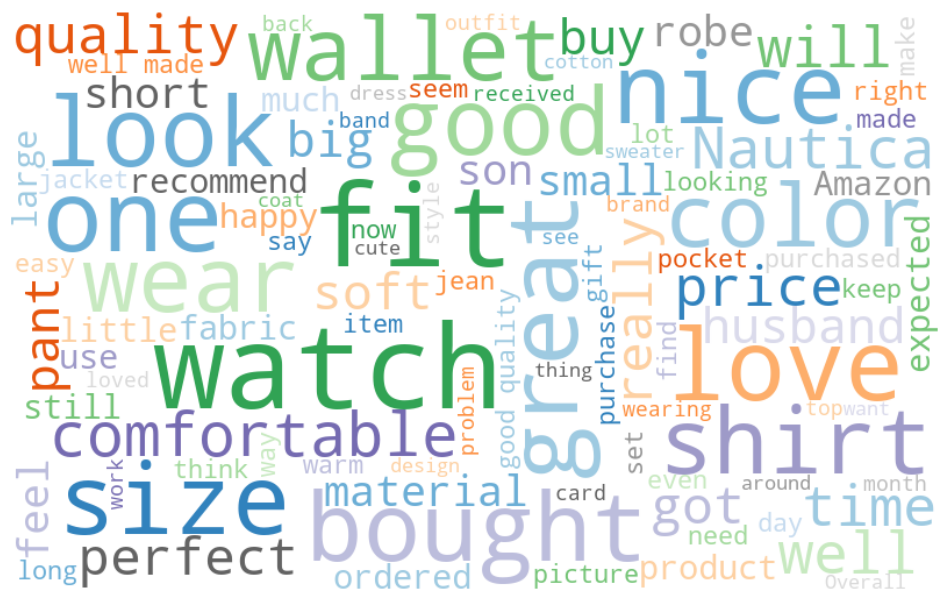

In [15]:
# check the frequency of words suing word cloud
txt = " ".join(r for r in product_reviews["text"])

wordcloud = WordCloud(
            background_color = 'white',
            colormap= 'tab20c',
            contour_width=3,
            contour_color='steelblue',
            # stopwords = STOPWORDS,
            collocations = True,
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [16]:
word_counter = {}
for word in list(txt.split(" ")):
    if len(word) > 5: # remove words with less 6 characters
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1

most_common_words = sorted(word_counter, key = word_counter.get, reverse = True)

# top 10 words from the df
most_common_words[:10]

['quality',
 'bought',
 'really',
 'little',
 'Nautica',
 'wallet',
 'looking',
 'because',
 'recommend',
 'comfortable']

Based on the wordcloud plot and word count analysis, we can observe frequent terms such as 'quality', 'bought', 'really', 'little', 'Nautica', 'wallet', 'looking', 'because', 'recommend', 'comfortable'. These words highlight key themes and topics present in the articles.

## Data Cleaning

To clean the reviews will implement the following steps:

1- Convert emojis into characters \
2- Split attached words (e.g TheNikeShoes) \
3- Convert text to lowercase \
4- Remove URLs \
5- Replace punctuation for a space (e.g.shoes...The) \
6- Remove any other punctuation \
7- Remove extra white spaces \
8- Remove single characters \
9- Remove tags \
10- Remove special characters \
11- Spell checking to correct typos\
12- Remove words shoter than 2 characters \
13- Remove stop words \
14- Lemmatize the words 

In [17]:
"""
Removing only punctuation may result in non-existent or incorrectly joined words. 
For example, in the phrase "Very nice shoes...my son loved," if we simply remove the punctuation, we end up with 
['nice', 'shoemy', 'son', 'loved'] instead of the correct separation ['very', 'nice', 'shoes', 'my', 'son', 'loved'].
"""

# Text Data Cleaning
reviews_cl = []
reviews = []

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
stop_words = stopwords.words('english')
stop_words.extend(['rt','etc', 'nt','para','raf','tal','nah', 'lol','ike', 'could','might','may','ago','also','ago','apart'])
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()

for i, review in enumerate(all_texts):
    # Text Cleaning part 1
    pre_proc_text = demojize(review) #Convert emojis into characters
    pre_proc_text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",pre_proc_text) if s]) #Split attached words . e.g(TheNikeShoes)
    pre_proc_text = pre_proc_text.lower() #Convert all text to lowercase
    pre_proc_text = re.sub(r"http\S+", "", pre_proc_text) #Remove URLs
    pre_proc_text = pre_proc_text.translate(translator) #Replace punctuation for a space
    pre_proc_text = re.sub(f"[{re.escape(string.punctuation)}]", "", pre_proc_text) #Removing Punctuation
    pre_proc_text = re.sub(r'\w*\d\w*', '', pre_proc_text) #Removing numbers
    pre_proc_text = " ".join(pre_proc_text.split()) #Removing extra Whitespaces
    pre_proc_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', pre_proc_text) #Removing single characters
    pre_proc_text = re.sub("<.*?>", "", pre_proc_text) #Removing Tags
    pre_proc_text = re.sub(r"[^a-zA-Z0-9\s]", "", pre_proc_text) #Removing special characters
    pre_proc_text = spell.correction(pre_proc_text) #Spell checking to correct typos

    # Text Cleaning part 2
    if pre_proc_text is not None: #only process a review if text exists
      # Pre-processing words in each item of the list
      pre_proc_text = nltk.word_tokenize(pre_proc_text) #Tokenize the text
      pre_proc_text = [w for w in pre_proc_text if len(w) > 2] #Remove tokens shorter than 2 characters
      pre_proc_text = [w for w in pre_proc_text if w not in stop_words] #Remove stop words
      pre_proc_text = [lemmatizer.lemmatize(w) for w in pre_proc_text] #Lemmatize the words

    # Join normalized words back into a sentence
      pre_proc_text = " ".join(pre_proc_text)

      #Store the cleaned review in the reviews_cl
      reviews_cl.append(pre_proc_text)
      reviews.append(review)

In [18]:
# Compare the first 5 original and cleaned reviews
for t, r in zip(reviews[:5], reviews_cl[:5]):
    print(t,"\n")
    print(r)
    print("=====================================================================================================\n")

If you're looking for a pair of pants that are roomy in the thigh area, you may have found what you're looking for. The drawback to these pants is twofold and related. These pants have a very long rise (the distance from the bottom of the crotch to the waistband), so you need to drop your inseam by 2-inches if you'd like to have these ride at your hips, rather than your waist. Problem is, there aren't a lot of options for the inseam at all waist sizes. In my case, I need a 42 x 30, and they don't make 'em. The 42s are shortest with a 32" inseam, which means a trip to the tailor to make 'em fit right. 

looking pair pant roomy thigh area found looking drawback pant twofold related pant long rise distance bottom crotch waistband need drop inseam inch like ride hip rather waist problem lot option inseam waist size case need make shortest inseam mean trip tailor make fit right

Great cut and fabric. Thank you NAUTICA. I am 6'5" and these pants are great fit especially with long rise. I alw

In [19]:
# check if both lists has the same size
len(reviews_cl), len(reviews)

(12798, 12798)

In [20]:
# create a new dfs
prod_reviews = product_reviews[product_reviews['text'].isin(reviews)]

prod_reviews["text_cl"] = reviews_cl

# reorder columns
prod_reviews = prod_reviews[['asin', 'title', 'text', 'text_cl']]

# check fields from the dataset
prod_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12798 entries, 0 to 13008
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   asin     12798 non-null  object
 1   title    12798 non-null  object
 2   text     12798 non-null  object
 3   text_cl  12798 non-null  object
dtypes: object(4)
memory usage: 499.9+ KB


In [ ]:
prod_reviews.sample(5)

#### Preprocessing the cleaned reviews 
1- Build a [corpus](https://www.geeksforgeeks.org/creating-a-new-corpus-with-nltk/) \
2- Remove common tokens \
3- Remove rare tokens 

In [24]:
# Create corpus and Text Cleaning part
# corpus = Corpus({ i:r for i, r in enumerate(all_texts[:5]) }, language="en")
corpus = Corpus({ i:r for i, r in enumerate(reviews_cl)}, language="en")
remove_common_tokens(corpus, df_threshold=0.85) # Remove common tokens
remove_uncommon_tokens(corpus, df_threshold=0.005) # Remove rare tokens

# Print corpus tokens
corpus_tokens_flattened(corpus)

['looking',
 'pair',
 'pant',
 'roomy',
 'area',
 'found',
 'looking',
 'pant',
 'pant',
 'long',
 'bottom',
 'need',
 'inch',
 'like',
 'rather',
 'waist',
 'problem',
 'lot',
 'option',
 'waist',
 'size',
 'case',
 'need',
 'make',
 'mean',
 'trip',
 'make',
 'fit',
 'right',
 'great',
 'cut',
 'fabric',
 'thank',
 'nautica',
 'pant',
 'great',
 'fit',
 'especially',
 'long',
 'always',
 'get',
 'one',
 'size',
 'longer',
 'fit',
 'bought',
 'watch',
 'back',
 'sporty',
 'looking',
 'feature',
 'like',
 'use',
 'water',
 'resistant',
 'case',
 'ever',
 'got',
 'back',
 'long',
 'short',
 'wore',
 'watch',
 'year',
 'day',
 'day',
 'average',
 'wear',
 'took',
 'worked',
 'job',
 'course',
 'time',
 'several',
 'comment',
 'appearance',
 'nice',
 'looked',
 'take',
 'great',
 'care',
 'fact',
 'still',
 'watch',
 'good',
 'working',
 'order',
 'issue',
 'band',
 'anything',
 'bought',
 'nautica',
 'watch',
 'bit',
 'looked',
 'good',
 'dress',
 'shirt',
 'watch',
 'never',
 'water',
 

## Exploratory Data Analysis (EDA)

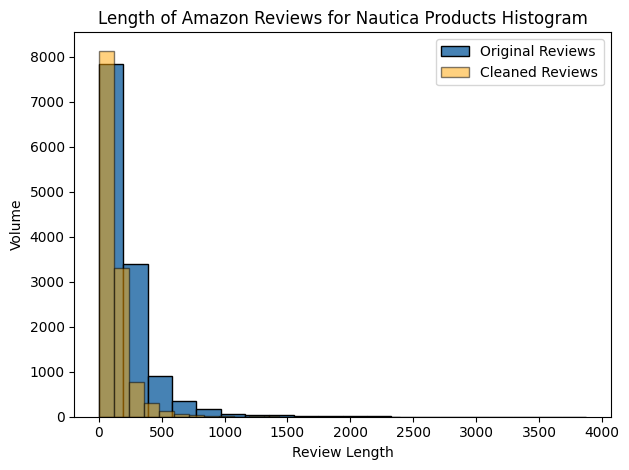

In [25]:
# Check Amazon reviews length distribution before and after data cleaning
plt.hist([len(r) for r in reviews], bins=20, edgecolor='black', color = "steelblue", label = "Original Reviews")
plt.hist([len(r) for r in reviews_cl], bins=20, edgecolor='black', color = "orange", alpha = 0.5, label = "Cleaned Reviews")
plt.title('Length of Amazon Reviews for Nautica Products Histogram')
plt.xlabel('Review Length')
plt.ylabel('Volume')
plt.legend(loc="upper right")
plt.tight_layout()

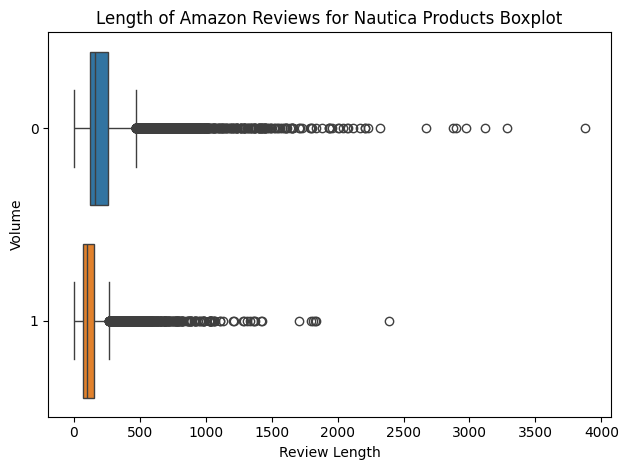

In [26]:
# Check the distribution using box plot
# sns.set(rc={"figure.figsize":(8, 4)}) #set up figure size for seaboarn graphs
sns.boxplot([[len(r) for r in reviews], [len(r) for r in reviews_cl]], orient="h")
# sns.boxplot(, orient="h", label = "Cleaned Reviews")
# plt.hist([len(r) for r in product_reviews["text"]], bins=20, edgecolor='black', color = "steelblue")
plt.title('Length of Amazon Reviews for Nautica Products Boxplot')
plt.xlabel('Review Length')
# plt.legend(loc="upper right")
plt.ylabel('Volume')
plt.tight_layout()

The histograms reveal a significant difference between the original and cleaned reviews. Most original reviews were shorter than 250 characters, whereas the cleaned reviews predominantly fall under 100. Additionally, the box plot shows that the range of outlier lengths has been reduced from 500-4000 characters in the original reviews to 250-2400 characters in the cleaned reviews. 

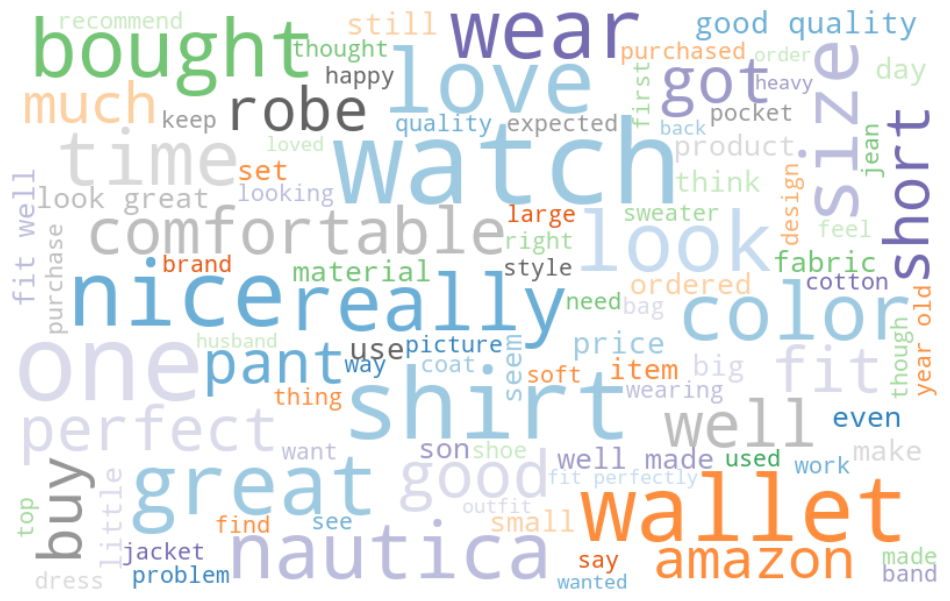

In [27]:
# check the frequency of words suing word cloud
txt = " ".join(r for r in reviews_cl)

wordcloud = WordCloud(
            background_color = 'white',
            colormap= 'tab20c',
            contour_width=3,
            contour_color='steelblue',
            # stopwords = STOPWORDS,
            collocations = True,
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
word_counter = {}
for word in list(txt.split(" ")):
    if len(word) > 5: # remove words with less 6 characters
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1

most_common_words = sorted(word_counter, key = word_counter.get, reverse = True)

# top 10 words from the train df
most_common_words[:10]

['quality',
 'nautica',
 'bought',
 'wallet',
 'really',
 'comfortable',
 'little',
 'perfect',
 'looking',
 'product']

There was no significant difference between the original and cleaned reviews when analyzing the word cloud plot and word count data.

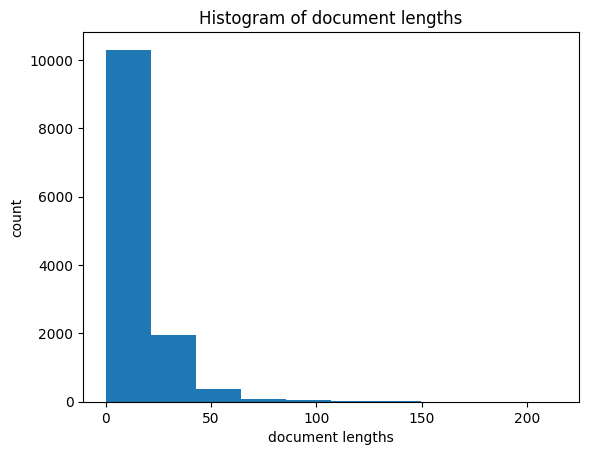

In [32]:
# Plot the distribution of document lengths (number of tokens per document)
fig, ax = plt.subplots()
plot_doc_lengths_hist(fig, ax, corpus, y_log=False)  # Use linear scale on y-axis
plt.show()

The histogram indicates that most documents have approximately 25 tokens.

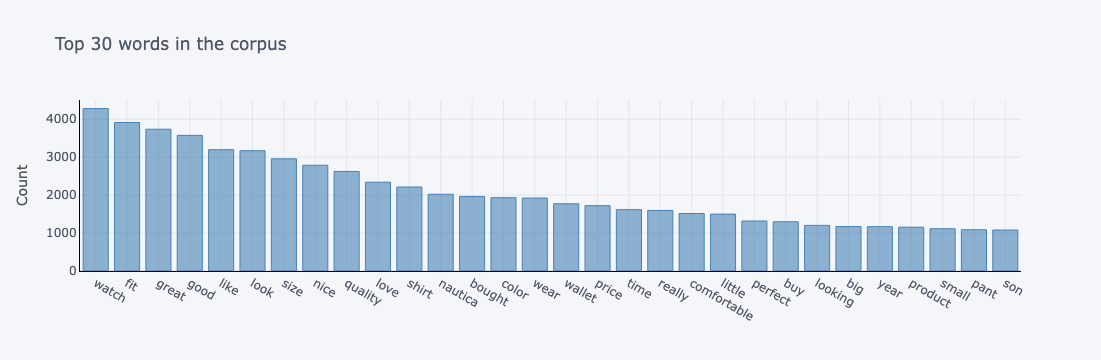

In [85]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
common_words = get_top_n_words(prod_reviews["text_cl"], 30)
top_30_wds = pd.DataFrame(common_words, columns = ['text_cl' , 'count'])
top_30_wds.groupby('text_cl').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', color = "steelblue", title='Top 30 words in the corpus')

**1.High-Frequency Terms**
>**Common Words**: Words like "watch," "fit," "great," and "good" appear most frequently. Their high counts suggest they are central to the reviews and reflect common sentiments or topics related to the products.\
>**Brand and Product Names**: Terms like "Nautica," "shirt," "wallet," and "pant" indicate specific products or brands. These words are likely central to the reviews and suggest a focus on these items in the dataset.

**2.Sentiment Indicators**
>**Positive Sentiments**: Words such as "great," "good," "like," "nice," "love," and "perfect" are positive and indicate favourable reviews and customer satisfaction.\
>**Neutral or Ambiguous Terms**: Words like "price," "size," and "year" are more neutral but are important for understanding context, such as the product’s attributes and pricing.

**3.Product Features and Attributes**
>**Attributes and Descriptions**: Words like "size," "colour," "quality," "fit," and "comfortable" describe product features and customer preferences. These terms suggest that reviews often discuss these aspects when evaluating products.\
>**Usage Context**: Words such as "wear," "buy," and "looking" indicate how customers use or interact with the products.

**4.Review Focus**
>**Product Types and Details**: Terms like "wallet," "shirt," "pant," and "product" focus on specific items, indicating that reviews cover a variety of products within the "Clothing, Shoes & Jewelry" category.\
>**Customer Experience**: Words like "bought," "price," and "really" provide insights into the purchasing experience and customer satisfaction.

### [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)

We will use [Textblob](https://textblob.readthedocs.io/en/dev/quickstart.html) to segment the Nautica product reviews based on sentiment, employing polarity scores which range from -1.0 to 1.0. A score below 0 indicates a negative sentiment, a score above 0 signifies a positive sentiment, and a score of 0 represents a neutral review. Following this, we will analyze the results by examining the distribution of polarity scores, reviewing the counts of each sentiment category, and analyzing sample reviews.

#### Add Polarity and Sentiment to the dataset for Sentimental Analysis

In [21]:
polarity, sentiment = [], []

for r in prod_reviews['text_cl']:
    polarity.append(round(TextBlob(r).sentiment.polarity,4))
    if polarity[-1] > 0:
      sentiment.append("positive")
    elif polarity[-1] < 0:
      sentiment.append("negative")
    else:
      sentiment.append("neutral")

prod_reviews["polarity"] = polarity
prod_reviews["sentiment"] = sentiment

# check the df details
prod_reviews.describe()

,polarity
count,12798.000000
mean,0.294621
std,0.228573
min,-1.000000
25%,0.150000
50%,0.293650
75%,0.445500
max,1.000000


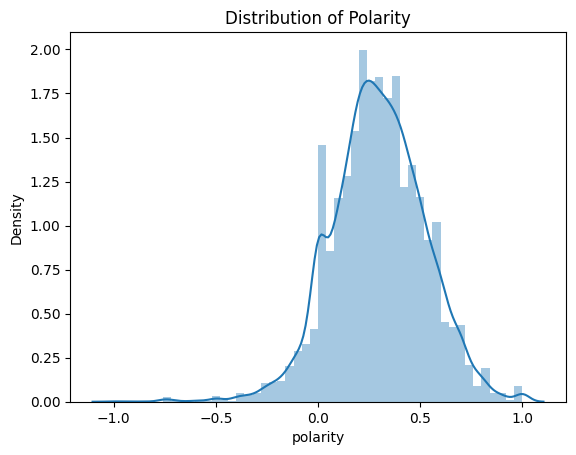

In [35]:
#Polarity Distribution
sns.distplot(prod_reviews["polarity"])
plt.title("Distribution of Polarity")
plt.show()

In [36]:
#counts by topic
sentiment_count = prod_reviews.groupby(["sentiment"]).size().reset_index(name='count')
sentiment_count

,sentiment,count
0,negative,923
1,neutral,445
2,positive,11430


In [41]:
# Check Negative reviews 
# Drop columns multiple column 
prod_reviews_sa = prod_reviews.drop(['asin', 'text_cl'], axis=1)
negative_reviews_topic = prod_reviews_sa.where((prod_reviews_sa['sentiment'] == "negative"))
negative_reviews_topic = negative_reviews_topic.dropna()

pd.set_option('display.max_colwidth', None)
negative_reviews_topic.sample(5)

,title,text,polarity,sentiment
7983,"Nautica Men's Langston Blackwatch Sleep Pant, Ponder Pine, Medium","I can't seem to find the thick fleece casual Nautica pants that Costco sells, anywhere! Costco has stopped selling them, so I guess they are just gone until next year?",-0.2667,negative
7212,Nautica Men's N17616G BFD 101 CHRONO BOX SET Classic Analog Watch,"Look 10 time more expensive than they are. Very good quality, too!To my surprise, for a merely $108 I got a watch that looks as if someone forgot to add one 0 at the end of it's price.",-0.1000,negative
1916,"Nautica Men's Sportswear True Khaki Flat Front Pant, True Khaki, 35W x 30L","A good pair of pants, I work in the Caribbean, Warehousing and Logistics, and these pants have held up. They're proper enough to go to meetings, lunches and just general casual activities as well as for working. I have put them through several washes by now and they haven't had any noticeable wear as of yet.I would also recommend as a casual set of weekend pants for those looking.",-0.0357,negative
1730,Nautica Men's Crunch Trifold Wallet,"The cloth lining in the bills compartments is a horrible striped blue and white. The credit card compartments are sewn at the same level, so the cards &#34;hide&#34; behind each other.",-0.3500,negative
185,"Nautica Men's Credit Card Trifold Wallet, Black","I bought this wallet as a Valentine's Day present because it is a trifold. My boyfriend specifically asked for a trifold. The leather is terrible. When I opened the box, I could not believe there were cracks all over the leather and it is stiff. There are plenty of pockets; however, the pockets are so stiff and tight, you cannot fit more than 3 cards in. I wish I had returned this product when I could have. I ended up going to saks and buying a wallet outside of our decided budget at the last minute because this one is so terrible.",-0.2452,negative


In [42]:
# Check Negative reviews for the topic 16 size shoe small wear
posivite_reviews_topic = prod_reviews_sa.where((prod_reviews['sentiment'] == "positive"))
posivite_reviews_topic = posivite_reviews_topic.dropna()
posivite_reviews_topic.sample(5)

,title,text,polarity,sentiment
1104,"Nautica Men's Double Ended Polished Silver Button Cufflinks,Silver,One Size",I gave my husband these cufflinks a while ago. They are really cute and of good quality! They look simple yet classy at the same time.,0.3250,positive
9515,"Nautica Baby-Boys Infant 2 Piece Bold Stripe Polo Set, Neon Lime, 18 Months",bought this for 1 year old. fit perfect.good quality fabric. A good price point for a growing little boy.,0.4521,positive
10469,"Nautica Women's Hooded Quilted Down Puffer Coat (X-Large, Black)",Great jacket for what I need it for. Going on Alaskan cruise - perfect weight and like the detachable hood. Nice fabric - fits perfectly with room for sweater underneath. Stylish enough to take me thru the whole winter - another plus!,0.5625,positive
9330,Nautica Sleepwear Women's Solid Anchor V Neck Sleep Shirt,"I love it, I wear it every time it's clean. I love the material and it is very comfortable. Great length, it's not too short, not too long.",0.3595,positive
1600,Nautica Men's Bedford Bomber Jacket,"Lightweight and made of thin material. I am 5'3 tall. 160 lbs. It fits me perfectly. It looks very stylish.This is the only jacket which is made by Nautica, that will fit me. I plan to buy the navy next time.",0.3167,positive


Based on the sentiment analysis, approximately 90% of the reviews have a positive sentiment with polarity scores above zero, indicating that most customers are satisfied with Nautica products. Only 7% of the reviews reflect a negative sentiment.

## Models

As outlined in the Goal & Explanation section, we will utilize Latent Dirichlet Allocation (LDA) and BERTopic methods for topic modeling. Following this, we will apply data clustering based on the identified topics. We will then evaluate the results from these methods and proceed to fine-tune the parameters to determine the optimal model.

### [Latent Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)

**Concept:**
"In natural language processing, latent Dirichlet allocation (LDA) is a Bayesian network (and, therefore, a generative statistical model) for modeling automatically extracted topics in textual corpora. The LDA is an example of a Bayesian topic model. In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics." "Wikipedia"

## Performing Topic Modeling using LDA clustering method with Random parameters

In [43]:
# set a corpus to use the in the first model
corpus_m1 = corpus

# set doc-term matrix
dtms = {
    "corpus": dtm(corpus_m1)
}

# set lda parameters
lda_params = {
    'n_topics': 30,
    'eta': .1, # topic word density, with high beta topics are made up of most of the words in the corpus, and with a low beta they consist of words.
    'n_iter': 2000,
    'random_state': 20240716, # to make results reproducible
    'alpha': 1 # it represents topic model document density, high alpha docs are made up of more topics. With lower Alpha docs contain fewer topics
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -2027672
INFO:lda:<10> log likelihood: -1734495
INFO:lda:<20> log likelihood: -1590525
INFO:lda:<30> log likelihood: -1519449
INFO:lda:<40> log likelihood: -1475295
INFO:lda:<50> log likelihood: -1451804
INFO:lda:<60> log likelihood: -1434914
INFO:lda:<70> log likelihood: -1427504
INFO:lda:<80> log likelihood: -1415349
INFO:lda:<90> log likelihood: -1410322
INFO:lda:<100> log likelihood: -1405226
INFO:lda:<110> log likelihood: -1398876
INFO:lda:<120> log likelihood: -1396713
INFO:lda:<130> log likelihood: -1393912
INFO:lda:<140> log likelihood: -1392309
INFO:lda:<150> log likelihood: -1392437
INFO:lda:<160> log likelihood: -1391023
INFO:lda:<170> log likelihood: -1390246
INFO:lda:<180> log likelihood: -1390305
INFO:lda:<190> log likelihood: -1390317
INFO:lda:<200> log likelihood: -1388486
INFO:lda:<210> log likelihood: -1388238
INFO:lda:

In [44]:
model = models["corpus"][0][1]
print_ldamodel_topic_words(model.topic_word_, vocabulary(corpus_m1), top_n=30)

topic_1
> #1. price (0.211449)
> #2. good (0.210102)
> #3. quality (0.118011)
> #4. looking (0.047333)
> #5. worth (0.041493)
> #6. money (0.036252)
> #7. value (0.029813)
> #8. buy (0.026519)
> #9. deal (0.025770)
> #10. paid (0.020829)
> #11. expensive (0.017535)
> #12. best (0.015588)
> #13. cost (0.013641)
> #14. reasonable (0.013192)
> #15. pay (0.011695)
> #16. beat (0.010347)
> #17. sale (0.008999)
> #18. excellent (0.008850)
> #19. especially (0.008550)
> #20. decent (0.006903)
> #21. nice (0.006753)
> #22. love (0.006454)
> #23. low (0.005855)
> #24. bought (0.005705)
> #25. hard (0.004657)
> #26. casual (0.004058)
> #27. le (0.004058)
> #28. disappointed (0.003908)
> #29. design (0.003309)
> #30. compared (0.003309)
topic_2
> #1. good (0.314161)
> #2. quality (0.267223)
> #3. product (0.055781)
> #4. material (0.051661)
> #5. high (0.046217)
> #6. excellent (0.045040)
> #7. expected (0.038713)
> #8. design (0.033857)
> #9. nice (0.025764)
> #10. colour (0.015906)
> #11. choic

In [45]:
# save the lda model and corpus
with open("nautica_lda_model.p", "wb") as nauticamodelfile:
    save_ldamodel_to_pickle(nauticamodelfile, model, vocabulary(corpus_m1), corpus.doc_labels, dtm=dtm(corpus_m1))

In [48]:
# read the lda model and corpus
with open("nautica_lda_model.p", "rb") as modelfile:
    lda_model_info_1 = load_ldamodel_from_pickle(modelfile)

# check keys
lda_model_info_1.keys()

dict_keys(['model', 'vocab', 'doc_labels', 'dtm'])

### Performing Data Clustering (LDA)

Perform topic classification on the documents to automatically cluster the data by topic

In [49]:
# set up variables for topic_labels
lda_model = lda_model_info_1["model"]
lda_vocab = lda_model_info_1["vocab"]
lda_dtm = lda_model_info_1["dtm"]
lda_doc_labels = lda_model_info_1["doc_labels"]

# set up top labels
lda_topic_labels = generate_topic_labels_from_top_words(
    lda_model.topic_word_,
    lda_model.doc_topic_,
    doc_lengths(lda_dtm),
    np.array(lda_vocab),
    lambda_= 1 #increment the lambda, you will increase the number of words
)

# print topic model
lda_topic_labels

array(['1_price', '2_good', '3_would', '4_nautica', '5_look', '6_bit',
       '7_watch', '8_set', '9_item', '10_robe', '11_pant', '12_fit',
       '13_year', '14_wear', '15_material', '16_warm', '17_one',
       '18_shirt', '19_color', '20_really', '21_short', '22_love',
       '23_time', '24_size', '25_month', '26_big', '27_well', '28_wallet',
       '29_back', '30_great'], dtype='<U11')

### Retrieve document classifications

In [50]:
doc_topic = lda_model.doc_topic_

documentclassifications = ldamodel_top_doc_topics(doc_topic, lda_doc_labels, top_n=2, topic_labels=lda_topic_labels)

documentclassifications.head()

,rank_1,rank_2
document,,
0,11_pant (0.1356),23_time (0.08475)
1,23_time (0.08696),30_great (0.06522)
2,7_watch (0.1654),29_back (0.1654)
3,24_size (0.08824),26_big (0.05882)
4,3_would (0.07895),7_watch (0.07895)


### Interpreting the topics in the topic model using pyLDAvis

In [51]:
ldavis_params = parameters_for_ldavis(
    lda_model.topic_word_,
    lda_model.doc_topic_,
    lda_dtm,
    lda_vocab
)

%matplotlib inline
vis = pyLDAvis.prepare(**ldavis_params)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis)

Based on the topic labels, the model's performance was subpar. The topics exhibited low topic probability and were characterized by single-word labels, making it unclear what each topic represents. For instance, the label "4_nautica" offers no insight into the specific content of the topic, as it only indicates a brand without revealing information about the product name, quality, defects, or sentiment.

In contrast, the pyLDAvis chart demonstrates a well-balanced distribution among the topics, as indicated by the uniform bubble sizes. Additionally, the blue bar chart highlights that words like "watch," "good," "great," "fit," and "like" are the most frequently used across all topics. Moreover, the limited overlap between the bubbles suggests that the topics are distinct from one another.

In summary, the model did not perform well. In the next phase, we will focus on finding the optimal parameters based on Topic Coherence Scores.

## Evaluate k, beta and alpha to find the best parameters

We will evaluate the coherence metrics, specifically the mimno and cao_juan methods, to fine-tune the hyperparameters of the LDA model. These methods help assess the quality of topics by measuring their coherence and interpretability. Our goal is to identify the optimal values for the following hyperparameters:

k: The number of topics, which influences how granularly the model can categorize the text.

beta: The topic-word distribution parameter, affecting the diversity of words associated with each topic.

alpha: The document-topic distribution parameter, which impacts the distribution of topics across documents.

By systematically adjusting these parameters and evaluating their impact using coherence scores, we aim to enhance the quality and relevance of the topics generated by the LDA model. This process will involve iteratively testing various configurations to find the combination that yields the most coherent and meaningful topics for our dataset.

In [52]:
const_params = {'n_iter': 2000,'eta': 0.1, 'random_state': 20240716}
ks = list(range(1, 70, 5))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(5*k)) for k in ks]
print(varying_params)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66]
[{'n_topics': 1, 'alpha': 0.2}, {'n_topics': 6, 'alpha': 0.03333333333333333}, {'n_topics': 11, 'alpha': 0.01818181818181818}, {'n_topics': 16, 'alpha': 0.0125}, {'n_topics': 21, 'alpha': 0.009523809523809525}, {'n_topics': 26, 'alpha': 0.007692307692307693}, {'n_topics': 31, 'alpha': 0.0064516129032258064}, {'n_topics': 36, 'alpha': 0.005555555555555556}, {'n_topics': 41, 'alpha': 0.004878048780487805}, {'n_topics': 46, 'alpha': 0.004347826086956522}, {'n_topics': 51, 'alpha': 0.00392156862745098}, {'n_topics': 56, 'alpha': 0.0035714285714285713}, {'n_topics': 61, 'alpha': 0.003278688524590164}, {'n_topics': 66, 'alpha': 0.0030303030303030303}]


In [53]:
eval_results = tm_lda.evaluate_topic_models(dtm(corpus),
    varying_params,
    const_params)

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 36
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 26
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 11
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 6
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 16
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 1
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 31
INFO:lda:n_iter: 2000
INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 21
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihoo

[(1, {'cao_juan_2009': nan, 'coherence_mimno_2011': -368.0165529450555}), (6, {'cao_juan_2009': 0.46882720437155395, 'coherence_mimno_2011': -376.35949302962644}), (11, {'cao_juan_2009': 0.4433391982923418, 'coherence_mimno_2011': -406.8997225645411}), (16, {'cao_juan_2009': 0.41152236444998763, 'coherence_mimno_2011': -415.786079690787}), (21, {'cao_juan_2009': 0.3781532169920283, 'coherence_mimno_2011': -408.54397638524955}), (26, {'cao_juan_2009': 0.34362199966862833, 'coherence_mimno_2011': -421.0781347258772}), (31, {'cao_juan_2009': 0.35076868297389346, 'coherence_mimno_2011': -421.5950960862277}), (36, {'cao_juan_2009': 0.33805486293035936, 'coherence_mimno_2011': -426.7845922555064}), (41, {'cao_juan_2009': 0.3401800326493953, 'coherence_mimno_2011': -437.01153664078555}), (46, {'cao_juan_2009': 0.33178581743308655, 'coherence_mimno_2011': -433.71234253471624}), (51, {'cao_juan_2009': 0.32839932807795363, 'coherence_mimno_2011': -432.62602270313056}), (56, {'cao_juan_2009': 0.3

(<Figure size 600x400 with 2 Axes>,
 [array([<Axes: title={'center': 'cao_juan_2009'}>,
         <Axes: title={'center': 'coherence_mimno_2011'}>], dtype=object)])

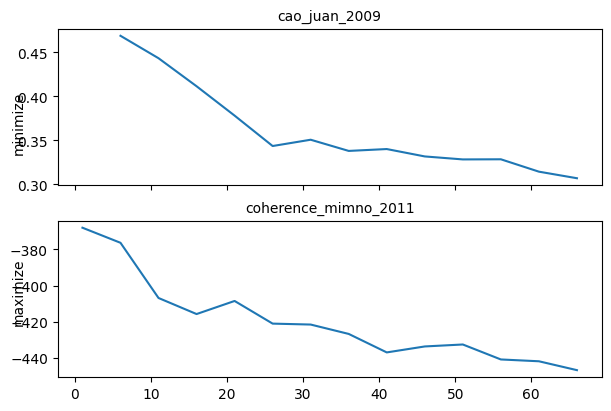

In [54]:
plot_eval_results(results_by_n_topics)

## Performing Topic Modeling using LDA clustering method (Tuning LDA hyperparameters)

Based on coherence mimno and cao_juan methods, we should change the number of topics(k) to 26 and alpha to 0.00769  to improve the model.

In [55]:
# set a corpus to use the in the first model
corpus_m2 = corpus

# set doc-term matrix
dtms_2 = {
    "corpus": dtm(corpus_m2)
}

# set lda parameters
lda_params_2 = {
    'n_topics': 26,
    'eta': .1, # topic word density, with high beta topics are made up of most of the owrds in the corpus, and with a low beta they consist of words.
    'n_iter': 2000,
    'random_state': 20240716, # to make results reproducible
    'alpha': 0.00769 # it represents topic model document density, high alpha docs are made up of more topics. With lower Alpha docs contain fewer topics
}

models_2 = compute_models_parallel(dtms_2, constant_parameters=lda_params_2)

INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 26
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -2555022
INFO:lda:<10> log likelihood: -1421857
INFO:lda:<20> log likelihood: -1371770
INFO:lda:<30> log likelihood: -1352354
INFO:lda:<40> log likelihood: -1338519
INFO:lda:<50> log likelihood: -1329669
INFO:lda:<60> log likelihood: -1321500
INFO:lda:<70> log likelihood: -1316882
INFO:lda:<80> log likelihood: -1312228
INFO:lda:<90> log likelihood: -1310101
INFO:lda:<100> log likelihood: -1306663
INFO:lda:<110> log likelihood: -1303993
INFO:lda:<120> log likelihood: -1302625
INFO:lda:<130> log likelihood: -1300807
INFO:lda:<140> log likelihood: -1298771
INFO:lda:<150> log likelihood: -1295698
INFO:lda:<160> log likelihood: -1295320
INFO:lda:<170> log likelihood: -1294676
INFO:lda:<180> log likelihood: -1293716
INFO:lda:<190> log likelihood: -1292611
INFO:lda:<200> log likelihood: -1291878
INFO:lda:<210> log likelihood: -1290588
INFO:lda:

In [56]:
model_2 = models_2["corpus"][0][1]
print_ldamodel_topic_words(model_2.topic_word_, vocabulary(corpus_m2), top_n=26)

topic_1
> #1. shirt (0.060114)
> #2. nautica (0.039715)
> #3. brand (0.024689)
> #4. quality (0.022400)
> #5. well (0.020012)
> #6. one (0.016429)
> #7. fit (0.015733)
> #8. like (0.013643)
> #9. great (0.013643)
> #10. good (0.013245)
> #11. bought (0.012548)
> #12. wear (0.010061)
> #13. time (0.009861)
> #14. made (0.009861)
> #15. product (0.009662)
> #16. look (0.009264)
> #17. color (0.009165)
> #18. long (0.009065)
> #19. year (0.008866)
> #20. comfortable (0.008468)
> #21. polo (0.008369)
> #22. price (0.008269)
> #23. love (0.008070)
> #24. buy (0.007672)
> #25. last (0.007573)
> #26. cotton (0.007573)
topic_2
> #1. muy (0.234711)
> #2. que (0.194219)
> #3. reloj (0.109048)
> #4. excelente (0.103463)
> #5. con (0.086708)
> #6. color (0.026669)
> #7. material (0.021083)
> #8. nautica (0.018291)
> #9. son (0.018291)
> #10. original (0.015498)
> #11. le (0.009913)
> #12. sport (0.008517)
> #13. super (0.007121)
> #14. jacket (0.005725)
> #15. do (0.005725)
> #16. short (0.004328)

In [57]:
# save the lda model 
with open("nautica_lda_model_2.p", "wb") as nauticamodelfile:
    save_ldamodel_to_pickle(nauticamodelfile, model_2, vocabulary(corpus_m2), corpus_m2.doc_labels, dtm=dtm(corpus_m2))

In [58]:
# read the lda model
with open("nautica_lda_model_2.p", "rb") as modelfile:
    lda_model_info_2 = load_ldamodel_from_pickle(modelfile)

# check keys
lda_model_info_2.keys()

dict_keys(['model', 'vocab', 'doc_labels', 'dtm'])

### Performing Data Clustering (LDA)

Perform topic classification on the documents to automatically cluster the data by topic

In [59]:
# set up variables for topic_labels
lda_model_2 = lda_model_info_2["model"]
lda_vocab_2 = lda_model_info_2["vocab"]
lda_dtm_2 = lda_model_info_2["dtm"]
lda_doc_labels_2 = lda_model_info_2["doc_labels"]

# set up top labels
lda_topic_labels_2 = generate_topic_labels_from_top_words(
    lda_model_2.topic_word_,
    lda_model_2.doc_topic_,
    doc_lengths(lda_dtm_2),
    np.array(lda_vocab_2),
    lambda_= 1 #increment the lambda, you will increase the number of words
)

# print topic model
lda_topic_labels_2

array(['1_shirt_nautica_brand', '2_muy_que_reloj', '3_shirt_color_great',
       '4_good_product_quality', '5_shirt_color_blue',
       '6_watch_band_time', '7_watch_look_love', '8_wallet_card_one',
       '9_amazon_price_nautica', '10_luggage_bag_set',
       '11_watch_one_time', '12_fit_month_shirt', '13_size_fit_year',
       '14_coat_jacket_warm', '15_fit_jean_short', '16_fit_love_outfit',
       '17_fit_good_recommend', '18_robe_comfortable_soft',
       '19_fit_comfortable_well', '20_watch_look_great',
       '21_wallet_card_pocket', '22_size_large_small',
       '23_size_good_quality', '24_good_quality_nice',
       '25_gift_bought_one', '26_shoe_sock_pair'], dtype='<U24')

### Retrieve document classifications

In [60]:
doc_topic_2 = lda_model_2.doc_topic_

documentclassifications_2 = ldamodel_top_doc_topics(doc_topic_2, lda_doc_labels_2, top_n=2, topic_labels=lda_topic_labels_2)

documentclassifications_2.head()

,rank_1,rank_2
document,,
0,15_fit_jean_short (0.8564),10_luggage_bag_set (0.1372)
1,1_shirt_nautica_brand (0.9881),25_gift_bought_one (0.0004747)
2,11_watch_one_time (0.6174),6_watch_band_time (0.2779)
3,23_size_good_quality (0.7161),6_watch_band_time (0.2399)
4,6_watch_band_time (0.9766),26_shoe_sock_pair (0.0009378)


### Interpreting the topics in the topic model using pyLDAvis

In [61]:
ldavis_params_2 = parameters_for_ldavis(
    lda_model_2.topic_word_,
    lda_model_2.doc_topic_,
    lda_dtm_2,
    lda_vocab_2
)

%matplotlib inline
vis_2 = pyLDAvis.prepare(**ldavis_params_2)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis_2)

The model has shown significant improvement, with the new topics providing valuable insights. For example, the topic labeled "3_shirt_color_great" clearly indicates positive reviews regarding the shirt's color. Similarly, "7_watch_look_love" reflects that reviewers were highly satisfied with their watch purchase. Additionally, we can identify reviews in Spanish, such as "2_muy_que_reloj."

Moreover, the topic probability scores have greatly improved overall. For instance, the topic "1_shirt_nautica_brand" has a topic probability score of 0.9881 for document 1. However, the pyLDAvis chart reveals that most topics are clustered on the right side of the chart, with considerable overlap. Only topics 2, 5, and 11 appear distinct from one another. This suggests that increasing the document density parameter (alpha) in the topic model could enhance performance and result in clearer topic differentiation.

## Performing Topic Modeling using LDA clustering method (Adjusting LDA hyperparameters)

For the next model, we will change alpha to 1/26 to improve topic differentiation.

In [62]:
# set a corpus to use the in the first model
corpus_m3 = corpus

# set doc-term matrix
dtms_3 = {
    "corpus": dtm(corpus_m3)
}

# set lda parameters
lda_params_3 = {
    'n_topics': 26,
    'eta': .1, # topic word density, with high beta topics are made up of most of the owrds in the corpus, and with a low beta they consist of words.
    'n_iter': 1000,
    'random_state': 20240716, # to make results reproducible
    'alpha': 1/26 # it represents topic model document density, high alpha docs are made up of more topics. With lower Alpha docs contain fewer topics
}

models_3 = compute_models_parallel(dtms_3, constant_parameters=lda_params_3)

INFO:lda:n_documents: 12798
INFO:lda:vocab_size: 632
INFO:lda:n_words: 209998
INFO:lda:n_topics: 26
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -2304704
INFO:lda:<10> log likelihood: -1502684
INFO:lda:<20> log likelihood: -1435292
INFO:lda:<30> log likelihood: -1408387
INFO:lda:<40> log likelihood: -1392696
INFO:lda:<50> log likelihood: -1383569
INFO:lda:<60> log likelihood: -1376526
INFO:lda:<70> log likelihood: -1374069
INFO:lda:<80> log likelihood: -1370491
INFO:lda:<90> log likelihood: -1367697
INFO:lda:<100> log likelihood: -1365126
INFO:lda:<110> log likelihood: -1362902
INFO:lda:<120> log likelihood: -1361943
INFO:lda:<130> log likelihood: -1360504
INFO:lda:<140> log likelihood: -1360424
INFO:lda:<150> log likelihood: -1359130
INFO:lda:<160> log likelihood: -1359256
INFO:lda:<170> log likelihood: -1358052
INFO:lda:<180> log likelihood: -1356854
INFO:lda:<190> log likelihood: -1356602
INFO:lda:<200> log likelihood: -1355689
INFO:lda:<210> log likelihood: -1355222
INFO:lda:

In [63]:
model_3 = models_3["corpus"][0][1]
print_ldamodel_topic_words(model_3.topic_word_, vocabulary(corpus_m3), top_n=26)

topic_1
> #1. nautica (0.082326)
> #2. brand (0.053859)
> #3. shirt (0.047011)
> #4. quality (0.038820)
> #5. product (0.023781)
> #6. bought (0.019887)
> #7. well (0.019618)
> #8. great (0.019081)
> #9. one (0.017604)
> #10. store (0.015187)
> #11. price (0.015187)
> #12. always (0.014918)
> #13. made (0.014784)
> #14. fit (0.014516)
> #15. amazon (0.014381)
> #16. good (0.013710)
> #17. find (0.013576)
> #18. buy (0.013307)
> #19. style (0.011561)
> #20. polo (0.010487)
> #21. like (0.010487)
> #22. clothing (0.009547)
> #23. year (0.009547)
> #24. love (0.009547)
> #25. size (0.009413)
> #26. different (0.009144)
topic_2
> #1. shoe (0.059022)
> #2. sock (0.040068)
> #3. wear (0.032816)
> #4. comfortable (0.031662)
> #5. pair (0.024740)
> #6. well (0.017158)
> #7. like (0.016663)
> #8. day (0.015510)
> #9. look (0.015015)
> #10. foot (0.013367)
> #11. ever (0.012543)
> #12. wearing (0.011884)
> #13. dress (0.010895)
> #14. work (0.010895)
> #15. enough (0.010730)
> #16. made (0.01056

In [64]:
# save the lda model
with open("nautica_lda_model_3.p", "wb") as nauticamodelfile:
    save_ldamodel_to_pickle(nauticamodelfile, model_3, vocabulary(corpus_m3), corpus.doc_labels, dtm=dtm(corpus_m3))

with open("nautica_lda_corpus.p", "wb") as nauticareviewsfile:
    pickle.dump(reviews, nauticareviewsfile)

In [65]:
 # read the lda model
with open("nautica_lda_model_3.p", "rb") as modelfile:
    lda_model_info_3 = load_ldamodel_from_pickle(modelfile)

with open("nautica_lda_corpus.p", "rb") as corpusfile:
    corpus_3 = pickle.load(corpusfile)

# check keys
lda_model_info_3.keys()

dict_keys(['model', 'vocab', 'doc_labels', 'dtm'])

## Performing Data Clustering (LDA)

Perform topic classification on the documents to automatically cluster the data by topic

In [66]:
# set up variables for topic_labels
lda_model_3 = lda_model_info_3["model"]
lda_vocab_3 = lda_model_info_3["vocab"]
lda_dtm_3 = lda_model_info_3["dtm"]
lda_doc_labels_3 = lda_model_info_3["doc_labels"]

# set up top labels
lda_topic_labels_3 = generate_topic_labels_from_top_words(
    lda_model_3.topic_word_,
    lda_model_3.doc_topic_,
    doc_lengths(lda_dtm_3),
    np.array(lda_vocab_3),
    lambda_= 1 #increment the lambda, you will increase the number of words
)

# print topic model
lda_topic_labels_3

array(['1_nautica_brand_shirt', '2_shoe_sock_wear', '3_shirt_look_fit',
       '4_good_quality_nice', '5_good_great_product', '6_watch_look_band',
       '7_coat_jacket_warm', '8_nautica_ordered_item',
       '9_amazon_one_price', '10_luggage_set_bag',
       '11_good_quality_would', '12_robe_fit_husband', '13_fit_size_old',
       '14_fit_short_sleeve', '15_fit_jean_pant', '16_gift_bought_love',
       '17_fit_love_cute', '18_pant_comfortable_soft',
       '19_recommend_would_great', '20_watch_time_hand',
       '21_year_one_wallet', '22_size_large_small', '23_color_blue_red',
       '24_wallet_card_pocket', '25_watch_great_look',
       '26_time_one_water'], dtype='<U24')

### Retrieve document classifications

In [199]:
doc_topic_3 = lda_model_3.doc_topic_

documentclassifications_3 = ldamodel_top_doc_topics(doc_topic_3, lda_doc_labels_3, top_n=2, topic_labels=lda_topic_labels_3)

documentclassifications_3.head()

,rank_1,rank_2
document,,
0,15_fit_jean_pant (0.7346),10_luggage_set_bag (0.2346)
1,15_fit_jean_pant (0.9434),26_time_one_water (0.002262)
2,26_time_one_water (0.3779),20_watch_time_hand (0.3677)
3,20_watch_time_hand (0.6077),13_fit_size_old (0.2077)
4,25_watch_great_look (0.3376),10_luggage_set_bag (0.3376)


### Interpreting the topics in the topic model using pyLDAvis

In [68]:
ldavis_params_3 = parameters_for_ldavis(
    lda_model_3.topic_word_,
    lda_model_3.doc_topic_,
    lda_dtm_3,
    lda_vocab_3
)

%matplotlib inline
vis_3 = pyLDAvis.prepare(**ldavis_params_3)
pyLDAvis.enable_notebook(local=True)
pyLDAvis.display(vis_3)

The new model demonstrated strong performance in generating insightful topics. For instance, the topic labeled "3_shirt_look_fit" captures reviews where customers appreciated the fit of their shirts. Similarly, "4_good_quality_nice" highlights satisfaction with the quality of Nautica products. The topic "16_gift_bought_love" reflects positive feedback on gifts that recipients loved.

The topic probabilities are also promising, with some topics scoring over 90%, such as "15_fit_jean_pant," which has a score of 0.9434 for document 1. The model excels in its pyLDAvis analysis, showing clear distinctions between topics with minimal overlap. This improvement suggests that the new model is well-suited for comparison with the BERTopic model.

### Inspect reviews from each topic

1- Split the topic id, topic name, and topic probability from rank 1 and add them to the df\
2- Link reviews to the model topics \
3- Remove duplicates if exists

In [206]:
# create new df
lda_topics_reviews = documentclassifications_3

# split the topic id, topic name, and topic probability
row_n, topic_id, lda_topic, lda_topic_prob = [], [], [], []
for i, d in enumerate(lda_topics_reviews["rank_1"]):
  row_n.append(i)  
  topic_id.append(int(d[:d.find("_")]))  
  lda_topic.append(d[d.find("_")+1:d.find(" ")])
  lda_topic_prob.append(float(d[d.find("(")+1:d.find(")")]))   

# Add row ids, topic id, topics, and topic probability to df
lda_topics_reviews["n"] = row_n
lda_topics_reviews["topic_id"] = topic_id
lda_topics_reviews["lda_topic"] = lda_topic
lda_topics_reviews["lda_topic_prob"] = lda_topic_prob



# Add the reviews to the doc
lda_topics_reviews["text"] = corpus_3


# Drop duplicates based on row ids
lda_topics_reviews.drop_duplicates(subset=['n'], keep='first', inplace=True, ignore_index=True)

# Remove rank columns
lda_topics_reviews = lda_topics_reviews.drop(['n','rank_1', 'rank_2'], axis=1)

# Reorder columns
# topics_asins_reviews = topics_asins_reviews.iloc[:,[2,1,0]]

#sort the data based on asin and
lda_topics_reviews = lda_topics_reviews.sort_values(["topic_id"], ascending=(True))

# check the df details
pd.set_option('display.max_colwidth', None)
lda_topics_reviews.head()

,topic_id,lda_topic,lda_topic_prob,text
9711,1,nautica_brand_shirt,0.5649,Nice cotton material. True to size. Perfect for summer lounging and to sleep in. Nautica is a quality brand. I'm always happy with this brand.
467,1,nautica_brand_shirt,0.4199,As someone said in another nautica watch review: A nautica watch will last forever like a rolex at a 1/10 of the price!
9558,1,nautica_brand_shirt,0.4700,"We love Nautica brand men's shirts. My husband is 6' 5&#34; and has a really difficult time finding a shirt that doesn't shrink up and go above his waistline. We will continue to buy Nautica brand shirts for both the great fit as well as the awesome quality product. The Men's Sunfish Palms V-neck shirt is just as pictured. It has a soft, jersey cotton feel to it but not super thin."
3418,1,nautica_brand_shirt,0.9517,"-After buying this and being pleased with the quality, I went on to buy several more Nautica shirts. One nice thing is that this shirt does not have the tacky Nautica logo (similar to the Nike swoosh) on the pocket; several other Nautical shirts I've looked at, and have not bought, do. Also, use the magnifier to ascertain whether the shirt actually has a pocket. This one does, but several others I bought by mistake do not.Nautica is one of the many brands owned by PVH Corp. PVH's brand portfolio includes owned brands comprising designer lifestyle brands, such as Calvin Klein and Tommy Hilfiger brands, as well as Van Heusen, IZOD, Bass, ARROW, and Eagle; and licensed brands consisting of Geoffrey Beene, Kenneth Cole New York, Kenneth Cole Reaction, Sean John, JOE Joseph Abboud, MICHAEL Michael Kors, Michael Kors Collection, CHAPS, Donald J. Trump Signature Collection, DKNY, Elie Tahari, Nautica, Ted Baker, J. Garcia, Claiborne, Robert Graham, U.S. POLO ASSN., Axcess, and Jones New York, as well as various other licensed and private label brands. The company is also involved in licensing its owned brands over a range of products. PVH Corp. markets its products through wholesale to national and regional department, mid-tier department, mass market, and specialty and independent stores; and retail stores, as well as through e-commerce Website. It leases and operates approximately 1,000 retail locations. The company was formerly known as Phillips-Van Heusen Corporation.That said, I have found that Nautica products vary greatly in quality. They apparently manufacture different versions of the same shirt for different distribution channels (e.g., I have found that the shirts they sell at outlet malls are of appreciably lower quality than those they sell through Macy's). Most recently, I bought two shirts on the company website that were manufactured in Mauritius and suffer from manufacturing shortcuts. Admittedly you get what you pay for, but the problem with Nautica is that you often don't know what you'e buying."
11517,1,nautica_brand_shirt,0.3149,"My son is in a 3T right now so he can't wear it yet. But the quality of his previous Nautica suit was good, so that's why I bought this one. Can't wait for him to be able to wear this one."


In [208]:
# Check records from the df
lda_topics_reviews.describe()

,topic_id,lda_topic_prob
count,12798.000000,12798.000000
mean,13.910142,0.579767
std,7.425737,0.173618
min,1.000000,0.038460
25%,7.000000,0.448700
50%,14.000000,0.559800
75%,20.000000,0.703800
max,26.000000,0.985600


### Create a table with LDA top topics counts and average topic probability to compare with the BerTopic results

In [350]:
lda_topic_prob = lda_topics_reviews.groupby(['topic_id', 'lda_topic']) \
                                            .agg({'text': 'size', 'lda_topic_prob': 'mean'}) \
                                            .rename(columns={'text':'lda_topic_count','lda_topic_prob':'lda_topic_prob_avg'}) \
                                            .reset_index()

# add a sample of reviews that the len greater than 50 or less or equal to 300 characters into the df
topics_ls150 = lda_topics_reviews.query('text.str.len() > 50 & text.str.len() <= 300')
lda_topic_prob["lda_sample_txt"] = [topics_ls150['text'][topics_ls150["topic_id"] == i+1].sample(1) for i in range(26)]

# check df values
lda_topic_prob

,topic_id,lda_topic,lda_topic_count,lda_topic_prob_avg,lda_sample_txt
0,1,nautica_brand_shirt,430,0.546568,"8811 Very nice shirt worth my money love it !I will be buying a lot more Nautica outfits for my kids ! Name: text, dtype: object"
1,2,shoe_sock_wear,337,0.535913,"9146 Most comfortable stylish socks i have ever bought. I will only buy nautica dress socks from here on out . Name: text, dtype: object"
2,3,shirt_look_fit,616,0.571887,"4295 I like the feel of these t-shirts as well as the tighter neckline I was looking for. Made well also. Name: text, dtype: object"
3,4,good_quality_nice,510,0.561977,"9440 I bought this item for my grand son andit was perfect. I love to buy another color it fits good. Name: text, dtype: object"
4,5,good_great_product,423,0.562181,"5796 Over all very happy with the purchase. Shipped fast, came looking like advertised. We have not had a chance to use it yet. So I am unable to rate the use/quality of the product. Name: text, dtype: object"
5,6,watch_look_band,597,0.608571,"847 Nice watch. All the features work great. The only one that is the temperature reading that gets pretty affected by your body temperature if you are wearing it. Name: text, dtype: object"
6,7,coat_jacket_warm,418,0.600629,"11595 My son loves this coat!!! He said it's very warm and even though it's a little big that's a plus as he will have it for a while Name: text, dtype: object"
7,8,nautica_ordered_item,330,0.549603,"3792 I got this shirt today and quite disappointed on the quality of the shirt.I will never recommend this product! Name: text, dtype: object"
8,9,amazon_one_price,353,0.536647,"1269 The Nautica Men's Trifold Wallet I purchased from Amazon could be better. Next time I will look for one with larger pockets and a flap to divide bills. Name: text, dtype: object"
9,10,luggage_set_bag,464,0.646726,"8637 So far this set of suitcases is easy and convenient and love the colors, helps it stand out at the baggage claim. It was very reasonably priced too. Name: text, dtype: object"


### [BERTopic](https://github.com/MaartenGr/BERTopic)

**Concept:**
"BERTopic is a topic modeling technique that leverages 🤗 transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions." BERTOPIC GitHub

In [148]:
# create a copy of the cleaned reviews 
allreviewtext = reviews_cl

# check the first review
allreviewtext[0]

'looking pair pant roomy thigh area found looking drawback pant twofold related pant long rise distance bottom crotch waistband need drop inseam inch like ride hip rather waist problem lot option inseam waist size case need make shortest inseam mean trip tailor make fit right'

### Perform topic modeling using BERTopic method

We start by initializing the BERTopic model and configure it to use English, as our documents are in that language. After fitting the model to our dataset, we proceed to calculate the topic probabilities for each document. This enables us to analyze the distribution and prominence of each topic within our corpus, offering valuable insights into how different themes are represented across the documents.

### Training

In [456]:
umap_model = UMAP(random_state=20240716)  # to make results reproducible
bert_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, umap_model=umap_model)
topics, probs = bert_topic_model.fit_transform(allreviewtext)

2024-08-05 09:49:55,565 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/400 [00:00<?, ?it/s]

2024-08-05 09:50:06,949 - BERTopic - Embedding - Completed ✓
2024-08-05 09:50:06,950 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-05 09:50:13,718 - BERTopic - Dimensionality - Completed ✓
2024-08-05 09:50:13,719 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-05 09:50:16,587 - BERTopic - Cluster - Completed ✓
2024-08-05 09:50:16,591 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-05 09:50:16,722 - BERTopic - Representation - Completed ✓


### Extracting Topics

After fitting our model, we will review the frequent topics by examining their counts and the words associated with each topic using the get_topic_info() method. This will help us understand the distribution and key characteristics of the prominent topics in our dataset.
**Note**:: The label -1 denotes outliers and should generally be disregarded. Next, we will focus on one of the prominent topics that have been generatedd:

In [419]:
freq = bert_topic_model.get_topic_info()

# check records
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2396,-1_shirt_size_fit_color,"[shirt, size, fit, color, wear, bought, quality, good, love, like]","[quality good husband like fabric feel little thick soft fit perfectly, like way shirt look son son wear size large fit perfectly, husband love fit well material good quality happy made purchase]"
1,0,2116,0_watch_band_wrist_time,"[watch, band, wrist, time, face, strap, look, dial, hand, big]","[female love watch big enough need glass read field big small wrist least opinion said dainty watch mean intended small lady large man watch solid feeling watch comfortable wrist like come brown black real leather band nicely made tool change look feel like watch much higher price tag easy set complicated button everywhere book simple understand found necessary read order figure set quite easy really hard watch outdoor girl far holding terrible treatment time perfectly accurate give another update future something change would buy beautiful watch heartbeat idea size inch watch thick face east west including metal bezel stem measure face measured north south end metal strap holder strap wide band smallest hole fit little bit lose last hole hole strap fit many wrist size, watch absolutely great delivered day watch circumference smaller perfect people smaller thinner wrist little heavier compared watch size weight give firm satisfactory feel indiglo light date feature fact waterproof combined excellent look feel make perfect everyday wear watch leather band quite thick strong unlike cheaper leather band two aspect like much first steel body around face watch wide bit thinner give bigger watch face second color leather band light almost seems like made plastic feel thickness great color light overall excellent watch price make mind watch get one, received watch gift happier great quality timepiece wear almost every day look great wrist get lot comment compliment others watch heavier taller wrist watch feel look substantial every way leather band soft quite comfortable day wear crown screw type keep water nice feature stopwatch function something use much watch feature work handy feature need one day like orange accent color two stopwatch button well bezel stopwatch hand interior face marking nite luminous hand hour mark glow nicely think con time since watch everything ask one additional note box set includes two extra watch band orange silver well removal tool allow easier removal watch band nice addition plan use watch well box large heavy well constructed fold panel hid instruction booklet gift box set make great presentation highly recomended]"
2,1,1144,1_outfit_cute_son_dress,"[outfit, cute, son, dress, daughter, month, old, baby, little, adorable]","[love like picture material soft comfortable baby look cute outfit, cute pant little big shirt vest fit perfectly great easter outfit year old, bought month old pant little big really cute outfit]"
3,2,1046,2_wallet_card_leather_credit,"[wallet, card, leather, credit, slot, pocket, bill, hold, cash, one]","[little smaller thought would actually like better last zipper wallet seems like last longer lot card good card slot would double card slot either big enough fit card need slot used often daily used card one side driver license fit card behind fit fine room decent amount cash hold cash time day fit, use one wallet time put heavy mileage wallet use hard find satisfactory wallet moreover one guy carry wallet front pocket sit always looking one comfortably fit front pocket hold credit card stuff admit skeptical bought figured would flimsy cheap leather duly impressed right wallet holding driver license selective service card two health card metro card smartlink card three credit card wallet cpr card three point card several business card cash receipt comfortable thin profile added bonus strong leather smell like interior pocket lined give wallet two thumb, owned nautica wallet one really liked went nautica seeing review wallet little he

In [441]:
bert_topic_model.get_topic(0)  # Select the most frequent topic

[('watch', 0.050494804162560386),
 ('band', 0.02176559028435843),
 ('wrist', 0.016595248864095292),
 ('time', 0.014031774062539403),
 ('face', 0.013658905451286882),
 ('strap', 0.013638530154271251),
 ('look', 0.013620732494961265),
 ('dial', 0.01273368182037867),
 ('hand', 0.01241467538458151),
 ('big', 0.011404673970528311)]

### Visualize Topics

While pyLDAvis is not compatible with BERTopic models, BERTopic provides its own tools for evaluating the model and its topics. The visualize_topics() function, for example, generates a chart with bubbles that resembles the visualizations produced by pyLDAvis. This visualization helps us assess and interpret the topics effectively.

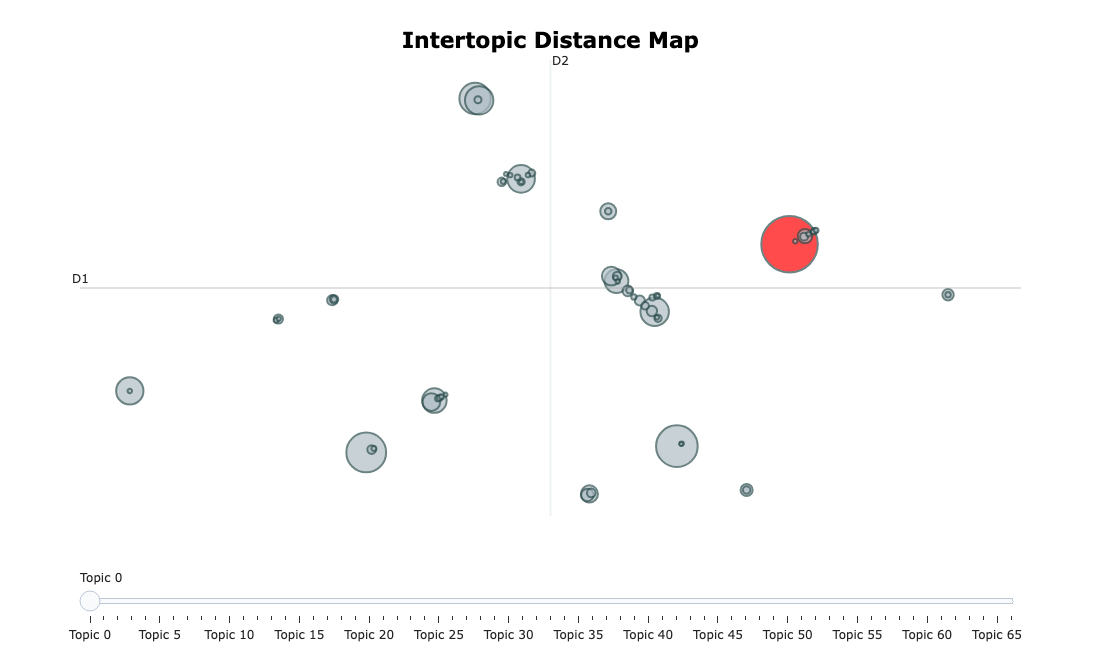

In [421]:
bert_topic_model.visualize_topics()

### Visualize Terms 

We will compare topic representations using the visualize_barchart() function, which creates bar charts based on the c-TF-IDF scores for selected terms in each topic. This visualization allows us to examine and compare the relative importance of terms both between and within topics.

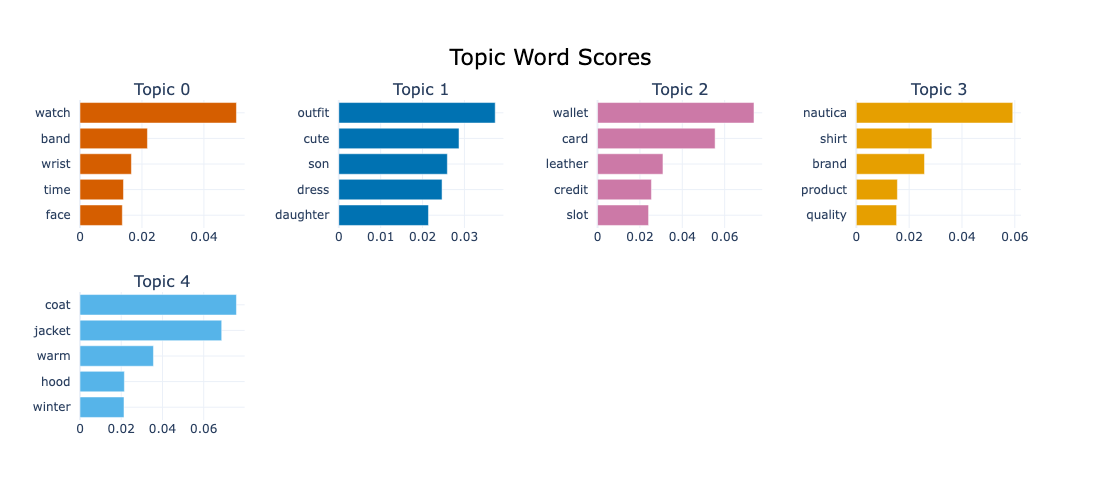

In [422]:
bert_topic_model.visualize_barchart(top_n_topics=5)

The intertopic distance map reveals significant overlap among topics, indicating minimal differentiation between the words associated with each topic. The topic word score chart, which displays the top five words by c-TF-IDF score for each topic, provides further insight. For example, in topic 0, "watch" is the most relevant word with a c-TF-IDF score of 0.05. In contrast, for topic 4, "coat" and "jacket" are identified as the most relevant words. This analysis highlights the need for further refinement to improve topic distinctiveness.

### Visualize Topic Hierarchy

The topics generated can be analyzed for potential hierarchical relationships. To explore this, we can use visualize_hierarchy() to cluster the topics and visualize their relationships. This hierarchical clustering will help us understand how topics are related and assist in selecting an optimal number of topics when consolidating or reducing the existing ones.

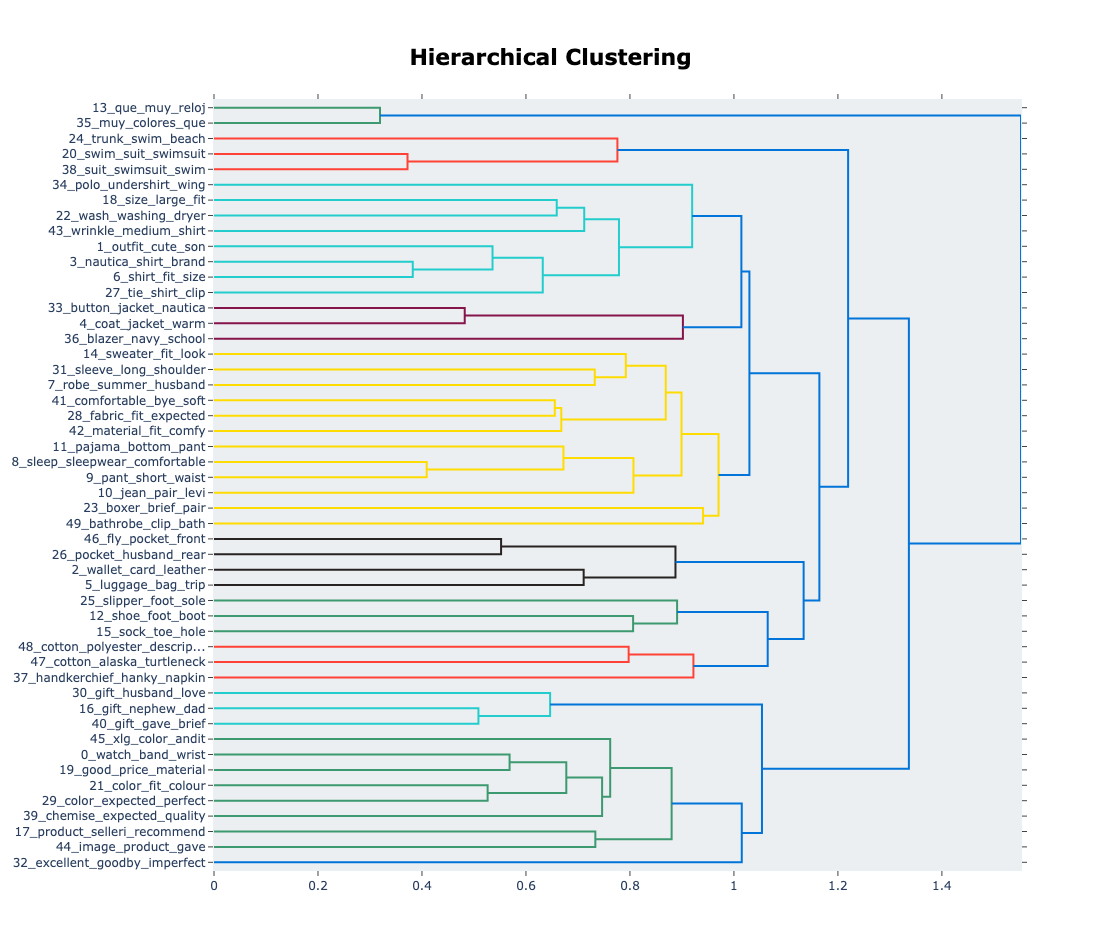

In [450]:
bert_topic_model.visualize_hierarchy(top_n_topics=50)

### Update Topics Adjusting BERTopic hyperparameters

To enhance the BERTopic model, we will adjust the n_gram_range parameter to (1, 2) to capture both unigrams and bigrams, and reduce the number of topics to 26 for a more focused and manageable topic set.

In [457]:
# change n_gram_range
bert_topic_model.update_topics(allreviewtext, topics, n_gram_range=(1, 2))

# Topic Reduction
bert_topic_model.reduce_topics(allreviewtext, nr_topics=26)
topics = bert_topic_model.topics_
probs = bert_topic_model.probabilities_

bert_topic_model.get_topic(0)   # We select topic that we viewed before

2024-08-05 09:50:17,567 - BERTopic - Topic reduction - Reducing number of topics
2024-08-05 09:50:18,045 - BERTopic - Topic reduction - Reduced number of topics from 68 to 26


[('fit', 0.02117370822809145),
 ('shirt', 0.02071120428681869),
 ('robe', 0.01668388257150478),
 ('size', 0.016287821875828095),
 ('great', 0.014952568326442506),
 ('nautica', 0.013366626610059367),
 ('well', 0.012752091331065576),
 ('good', 0.012518652912722113),
 ('quality', 0.012507587041687123),
 ('nice', 0.011979232244831025)]

### Extracting Topics

In [459]:
bert_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2396,-1_fit_size_shirt_good,"[fit, size, shirt, good, like, quality, color, wear, bought, love]","[initially surprised sweater seem much heavier material weight thickness nice cotton pique polo shirt sweater material cotton texture quality brushed cotton fabric tight closed weave soft touch wearing impressed adaptable fall spring sweater temperature low wear shirt forget even temperature rise low sixty day breathes well bunch amply cut size little loose like sweater way great supported collar neck roll creep upward worn want tighter fit try smaller two size word fine sweater seems half size larger name brand sweater size mild criticism although washed sweater lightweight clothing dried delicate setting quality dryer sweater come looking wrinkle free mean turn inside iron low setting make look sharp picture seems keep light pressing fine color accurate picture full red move toward rose end red little heather pattern wrist waist band great cotton shirt sweater ribbed cuff waist tighten machine dried one far using delicate cycle prevent well preserve brushed cotton finish way take half star finish even carefully dried rate star, husband love fit well material good quality happy made purchase, would recommend anyone color good quality perfect fit well love outfit]"
1,0,4119,0_fit_shirt_robe_size,"[fit, shirt, robe, size, great, nautica, well, good, quality, nice]","[wow sooooo surprised got robe husband christmas time thick good quality well made nice detail sharp bought navy blue pin stripe husband beyond thrilled really nice looking warm around robe one size fit terrified fit fit absolutely perfectly everything purchase make smile great price great quality husband loved look awesome gift wrap job amazon amazing, pleased shirt arrived look great true size good quality shirt son, another gift got hub begged whole month badly wanted robe winter robe soft longer maybe hoodie yada yada yada made tough ignored got knew would like doubt get man nautica always fit perfectly love style soft clothes love sexy brand make look done deal really honestly purchase since one size fit robe husband scrawny sense word somewhere around big guy hold weight well since muscle nautica never failed finding something fit tom husband ever bought something absolutely love style feel robe tricky one size fit big man tough buy fit room spare thing wish better length short true picture provided would rather something cover leg gave blanket good haha]"
2,1,2116,1_watch_band_look_time,"[watch, band, look, time, wrist, great, good, like, nice, big]","[bought watch husband christmas beautiful nice good watch great watch, gave watch category price obviously high end watch bit le bought two january one blue face one black face son blue face white lettering yellow hand look bit better black face white hand dial easy year old eye read sold soon got course son conveniently lost black watch week keep good time unlike invicta watch bought seem solid well made looking past month buy another blue one happy finally see come back sale today amazon ala appears got last one going buy two spare expensive watch cost much watch like citizen eco drive chronometer canvas strap eco drive perpetual stainless steel watch citizen proximity custom steel band installed stainless luminox nautica let wear decent looking affordable watch activity possibly damage nicer watch comment battery life adjust time since bought except daylight saving time pretty sure within minute correct time jan dst changed comment water resistance recommendation surface swim watch link easy take invicta watch sizing tool small wrist size unlike invictas one complaint unfortunately luminescent hand retain much charge normal daylight exposure day bad enough son bet hand glow charge glowing hand lumen flashlight half minute night still read time hand hour dark comparison even citizen watch luminescent hand seems last twice long seems bright citizen watch see

### Visualize Topics

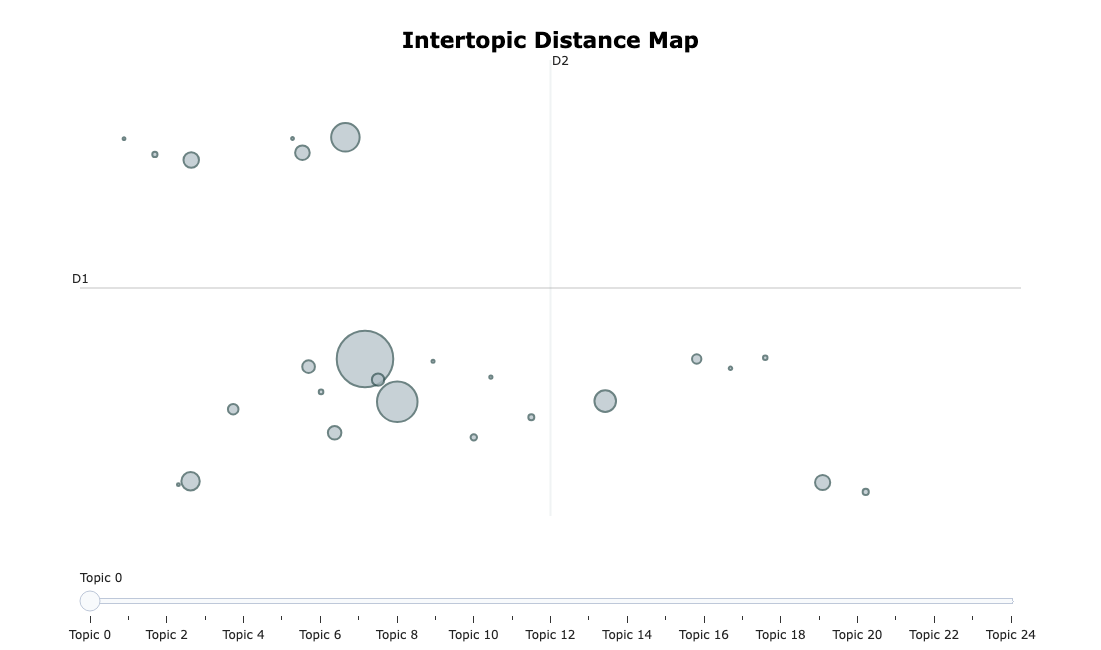

In [444]:
bert_topic_model.visualize_topics()

### Visualize Terms 


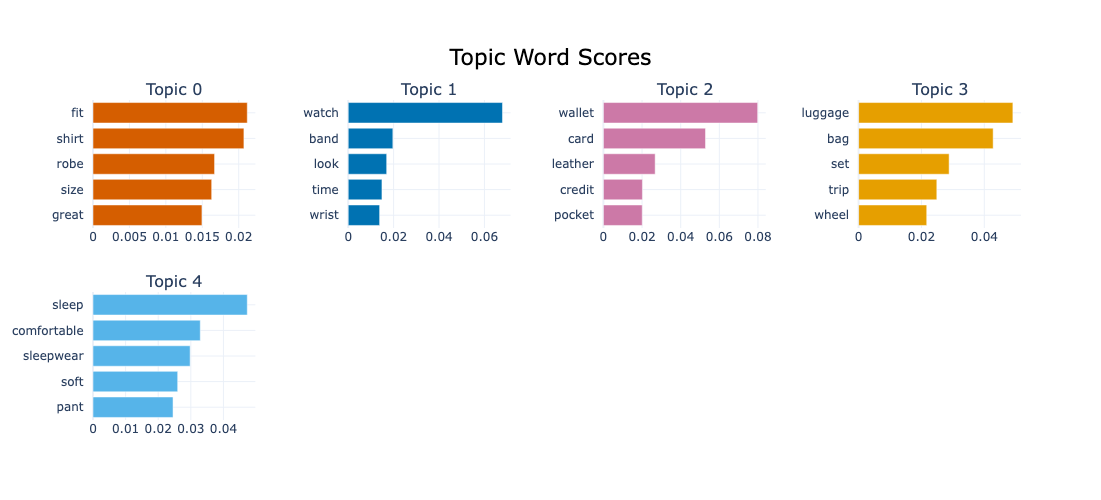

In [431]:
bert_topic_model.visualize_barchart(top_n_topics=5)

The updated intertopic distance map demonstrates significant improvement in topic differentiation, with only minimal overlap between topics. This indicates that most topics are now clearly distinct from one another. Additionally, the topic word score chart reveals a shift in the most relevant terms. Previously, "watch" had the highest c-TF-IDF score, whereas now "fit" and "shirt" are the most prominent terms. This change suggests a more refined and accurate representation of topics.

### Visualize Topic Hierarchy

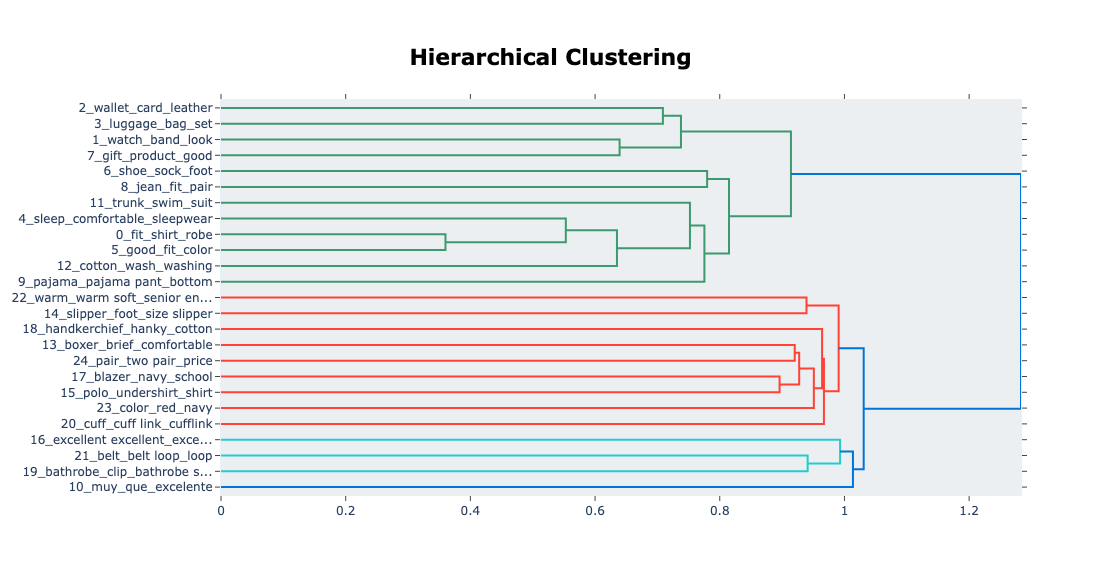

In [448]:
bert_topic_model.visualize_hierarchy(top_n_topics=50)

### Model serialization

The model and its internal settings can easily be saved. Note that the documents and embeddings will not be saved. However, UMAP and HDBSCAN will be saved.

In [451]:
# Save model
bert_topic_model.save("bert_topic_model")

2024-08-05 09:48:54,261 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [452]:
# Load model
bert_topic_model = BERTopic.load("bert_topic_model")

In [453]:
bert_topic_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

### Create a table with BERTopic topics counts and topic probability score to compare with the LDA results

In [454]:
from statistics import mean

# gather top topics from bert_topics
bert_topics_all_probs = pd.DataFrame(topics)
bert_topics_all_probs["Topic"] = bert_topics_all_probs[0]

#Gather the prob from the probs based on the topic id 
bert_topics_all_probs["BerTopic_topic_prob"] =  [round(p[t],6) for t, p in zip(topics, probs)]

# Gather topic name, counts from the freq df
bert_topics_all_probs = bert_topics_all_probs.merge(freq_2[["Topic","Count","Name"]])

# gather mean of topic_prob of each topic
bert_topics_prob = bert_topics_all_probs.groupby(["Topic", "Count", "Name"]) \
                                            .agg({'BerTopic_topic_prob': 'mean'}) \
                                            .rename(columns={'BerTopic_topic_prob':'BerTopic_topic_prob_avg'}) \
                                            .reset_index()

# create topic id to merge with the LDA ids & drop the Topic field
bert_topics_prob["topic_id"] = [i + 2 for i in bert_topics_prob["Topic"]]
bert_topics_prob = bert_topics_prob.drop(["Topic"], axis=1)

# Rename & Reorder columns
bert_topics_prob.rename(columns = {"Count":"BerTopic_topic_count","Name":"BerTopic_topic"}, inplace = True)
bert_topics_prob = bert_topics_prob.iloc[:,[3,1,0,2]]

bert_topics_prob

,topic_id,BerTopic_topic,BerTopic_topic_count,BerTopic_topic_prob_avg
0,1,-1_fit_size_shirt_like,3690,0.013469
1,2,0_watch_wallet_card_look,3766,0.646575
2,3,1_robe_shirt_fit_size,1749,0.439062
3,4,2_nautica_muy_shirt_que,710,0.649480
4,5,3_sweater_jacket_coat_warm,522,0.510239
5,6,4_pajama_pant_comfortable_bottom,368,0.471744
6,7,5_shoe_sock_slipper_foot,341,0.648608
7,8,6_jean_fit_pair_nautica jean,236,0.352057
8,9,7_gift_christmas_loved_bought,226,0.550210
9,10,8_trunk_swim_suit_fit,188,0.425402


## Results and Analysis

### Compare LDA and BERTopic models by topics, counts, and topic probability average

In [437]:
topic_probs =  pd.merge(lda_topic_prob, bert_topics_prob, on = "topic_id", how = "inner") 
topic_probs = topic_probs.drop(["lda_sample_txt"], axis=1)
topic_probs = topic_probs.iloc[:,[0,1,4,2, 5,3,6]]

topic_probs

,topic_id,lda_topic,BerTopic_topic,lda_topic_count,BerTopic_topic_count,lda_topic_prob_avg,BerTopic_topic_prob_avg
0,1,nautica_brand_shirt,-1_fit_size_shirt_like,430,3690,0.546568,0.013469
1,2,shoe_sock_wear,0_watch_wallet_card_look,337,3766,0.535913,0.630448
2,3,shirt_look_fit,1_robe_shirt_fit_size,616,1749,0.571887,0.646575
3,4,good_quality_nice,2_nautica_muy_shirt_que,510,710,0.561977,0.649480
4,5,good_great_product,3_sweater_jacket_coat_warm,423,522,0.562181,0.643957
5,6,watch_look_band,4_pajama_pant_comfortable_bottom,597,368,0.608571,0.489348
6,7,coat_jacket_warm,5_shoe_sock_slipper_foot,418,341,0.600629,0.643297
7,8,nautica_ordered_item,6_jean_fit_pair_nautica jean,330,236,0.549603,0.630006
8,9,amazon_one_price,7_gift_christmas_loved_bought,353,226,0.536647,0.606725
9,10,luggage_set_bag,8_trunk_swim_suit_fit,464,188,0.646726,0.230049


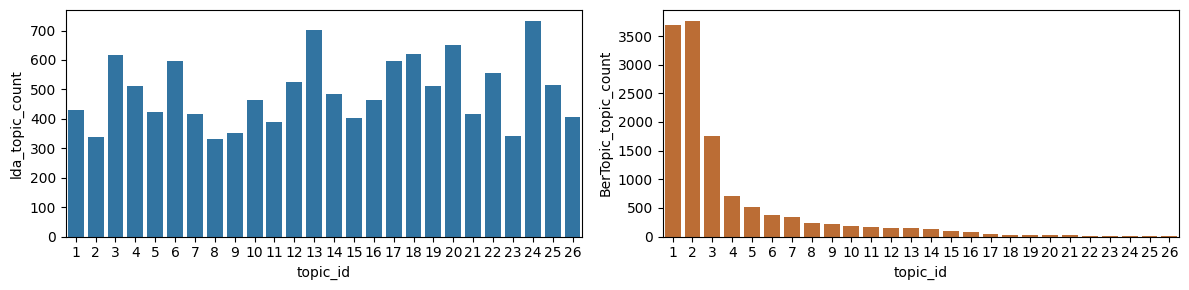

In [438]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1,2, figsize=(12, 3))
sns.barplot(data = topic_probs ,x = 'topic_id', y = 'lda_topic_count', ax=axes[0])
sns.barplot(data = topic_probs, x = 'topic_id', y = 'BerTopic_topic_count', color= 'chocolate', ax=axes[1])
fig.tight_layout()

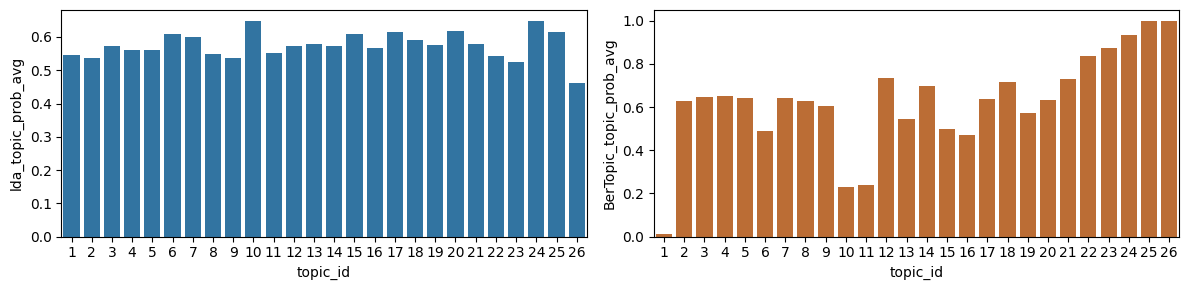

In [439]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1,2, figsize=(12, 3))
sns.barplot(data = topic_probs ,x = 'topic_id', y = 'lda_topic_prob_avg', ax=axes[0])
sns.barplot(data = topic_probs, x = 'topic_id', y = 'BerTopic_topic_prob_avg', color= 'chocolate', ax=axes[1])
fig.tight_layout()

#### Summary of Key Observations

**Topic Coverage and Prevalence**

LDA: Topics generally have a more balanced distribution in terms of the number of documents. For example, topics like fit_jean_pant and watch_time_hand have higher counts (403 and 651 respectively). \
BERTopic: Some topics have very high document counts, such as fit_size_shirt_like with 3690 documents, while others have very low counts like 19_blazer_navy_school_son with just 24 documents. This indicates a wider variance in topic distribution. The first topic (fit_size_shirt_like) is an outlier and that means the model was not able to cover an high number of documents, since 3690 is about 29% of the reviews.

**Topic Probability Averages**

LDA: The average probabilities for LDA topics tend to be higher, with values such as 0.6077 for fit_jean_pant and 0.6467 for luggage_set_bag. This reflects a higher concentration of topic relevance within documents. \
BERTopic: The average probabilities for BERTopic topics vary widely. Some topics like 3_sweater_jacket_coat_warm and 12_cotton_fabric_flannel_good have very high probabilities (0.6439 and 0.697 respectively), indicating strong relevance. Conversely, other topics have lower probabilities, such as 8_trunk_swim_suit_fit with 0.23.

**Topic Labels**

LDA: Topics are generally described by straightforward labels based on the predominant words, e.g., good_quality_nice and fit_size_old. \
BERTopic: Topics often have more descriptive and complex labels, such as polo_size_polo_one_love_polo and handkerchief_hanky_cotton_cotton_handkerchief, reflecting the model’s capability to identify nuanced themes.

**Document Assignment**

LDA: The assignment of documents to topics appears more distributed across topics. Topics with fewer documents like fit_short_sleeve and gift_bought_love have more moderate probabilities. \
BERTopic: Topics with high counts have very low probabilities, suggesting that while many documents are assigned to these topics, the actual relevance or strength of association per document is relatively low.

**High Variance in Topic Relevance**

LDA: The variance in topic probability averages is less pronounced. Topics tend to have more consistent relevance across documents. \
BERTopic: There is high variability in topic probability averages, with some topics showing very high or very low relevance.

## Discussion and Conclusion

### **Conclusion:**

The comparative analysis of LDA and BERTopic models highlights distinct differences in how each model represents and assigns topics within a corpus. LDA tends to offer a balanced distribution of topics with consistently higher average probabilities, indicating a stable and clear representation of themes. This makes LDA suitable for applications requiring a straightforward and uniform topic distribution.

In contrast, BERTopic provides a more detailed and nuanced depiction of topics, with highly descriptive labels and a wider variance in topic prevalence and relevance. While some topics are represented in a large portion of the documents, others are only marginally covered. This variability can be advantageous for identifying and exploring specific themes but may also result in uneven topic representation.

Overall, the choice between LDA and BERTopic should be guided by the specific objectives of the analysis. LDA is preferable for projects needing consistent and balanced topic distributions, while BERTopic excels in capturing complex and varied thematic structures, albeit with greater variability in topic relevance and coverage. Understanding these differences enables more informed decisions in selecting the most appropriate model for topic analysis and interpretation.

For the next phase, it will be valuable to conduct a sentiment analysis on the topics generated by the models. This will help us determine whether the reviews associated with each topic are predominantly positive or negative. Additionally, we could apply the models to larger datasets, utilizing platforms like Google Colab Pro to handle the increased data volume efficiently. To further enhance our analysis, we might also explore alternative methods such as Latent Semantic Analysis (LSA), Non-Negative Matrix Factorization (NMF), and Top2Vec to gain additional insights and compare results across different topic modeling approaches.